In [1]:
import sys
import os
import json
sys.path.append(os.environ["CODE_REPOSITORY"])
from code_repository.hotones.thetools import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
external = os.path.join("/media","jofrony","2TB", 
                        "dardel", "current_bgd2","plateaus_with_inhibition", 
                        "supercomputer", "networks")
repository = os.path.join("/home","jofrony","Documents",
                          "Repositories","current_bgd2",
                          "plateaus_with_inhibition","supercomputer","networks")

In [3]:
folder = "dendrite_traces"

In [4]:
plateau_ids = os.path.join(repository,
                           "pdc_network_2022-10-04",
                          "cell_ids_plateaus.json")
with open(plateau_ids) as f:
    plateau_ids = json.load(f)

In [5]:
e = Experiments()
e.add_experiment(name="plateaus_without_inhibition",
                 color="black",
                 label="plateaus without inhibition",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-10-04"),
                 output="network_output_modified_NMDA_recording_3_clusters_input-spikes_no_inhibition.hdf5")
e.add_experiment(name="plateaus_with_inhibition",
                 color="red",
                 label="plateaus with inhibition",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-10-04"),
                 output="network_output_modified_GABA_NMDA_recording_3_clusters_input-spikes_cell_ids_current_injection_dardel_2022-10-04-18-10-06_plateau_inhibition_p1.hdf5")

e.experiments     

{'plateaus_without_inhibition': {'color': 'black',
  'label': 'plateaus without inhibition',
  'network': 'network-synapses.hdf5',
  'path': '/media/jofrony/2TB/dardel/current_bgd2/plateaus_with_inhibition/supercomputer/networks/pdc_network_2022-10-04',
  'output': 'network_output_modified_NMDA_recording_3_clusters_input-spikes_no_inhibition.hdf5'},
 'plateaus_with_inhibition': {'color': 'red',
  'label': 'plateaus with inhibition',
  'network': 'network-synapses.hdf5',
  'path': '/media/jofrony/2TB/dardel/current_bgd2/plateaus_with_inhibition/supercomputer/networks/pdc_network_2022-10-04',
  'output': 'network_output_modified_GABA_NMDA_recording_3_clusters_input-spikes_cell_ids_current_injection_dardel_2022-10-04-18-10-06_plateau_inhibition_p1.hdf5'}}

In [6]:
sl = LoadSimulations(experiments=e)
sl.load_network_file(load_synapses=False)

Loading 40000 neurons with 35040256 synapses and 2531 gap junctions
Loading /media/jofrony/2TB/dardel/current_bgd2/plateaus_with_inhibition/supercomputer/networks/pdc_network_2022-10-04/simulation/network_output_modified_NMDA_recording_3_clusters_input-spikes_no_inhibition.hdf5
Loading 40000 neurons with 35040256 synapses and 2531 gap junctions
Loading /media/jofrony/2TB/dardel/current_bgd2/plateaus_with_inhibition/supercomputer/networks/pdc_network_2022-10-04/simulation/network_output_modified_GABA_NMDA_recording_3_clusters_input-spikes_cell_ids_current_injection_dardel_2022-10-04-18-10-06_plateau_inhibition_p1.hdf5


In [7]:
sample_ids = plateau_ids['plateaus'][::100]
sample_ids_per_exp = {k:sample_ids for k in e.experiments}

In [8]:
neuron_type="SPN"
specific_trace_ids = {k: plateau_ids["plateaus"] for k in e.experiments}
dt_step=0.5

In [9]:
experiments = sl.get_experiment_names()

In [10]:
common_per_experiment = specific_trace_ids["plateaus_without_inhibition"]

In [11]:
data_per_experiment = {e_name: sl.get_data(name=e_name) for e_name in experiments}

In [12]:
cs = {"plateaus_without_inhibition": 'black', 
      "plateaus_with_inhibition": 'red'}

In [13]:
parameters = {"start": 1, "end": 1.25}

In [14]:
%%time
neuron_type = "dSPN"
specific_trace_ids = sl.get_population_units(neuron_type=neuron_type, population_unit=1)
frequency_analysis_dict_dspn = frequency_analysis(data_obj=sl, neuron_type=neuron_type, trace_ids=specific_trace_ids, parameters=parameters)

CPU times: user 15.5 s, sys: 1.35 s, total: 16.9 s
Wall time: 1min 28s


In [15]:
%%time
neuron_type = "iSPN"
specific_trace_ids = sl.get_population_units(neuron_type=neuron_type, population_unit=1)
frequency_analysis_dict_ispn = frequency_analysis(data_obj=sl, neuron_type=neuron_type, trace_ids=specific_trace_ids, parameters=parameters)

CPU times: user 4.24 s, sys: 187 ms, total: 4.43 s
Wall time: 8.52 s


In [16]:
tmps = list()
for trace_id in common_per_experiment:
    add = list()
    for experiment_name in experiments:
        if trace_id in frequency_analysis_dict_dspn[experiment_name]:
            freq = frequency_analysis_dict_dspn[experiment_name][trace_id]
        elif trace_id in frequency_analysis_dict_ispn[experiment_name]:
            freq = frequency_analysis_dict_ispn[experiment_name][trace_id]
        add.append(freq)
        
    if add[0] > 0 or add[1] > 0:
        tmps.append(trace_id)
        

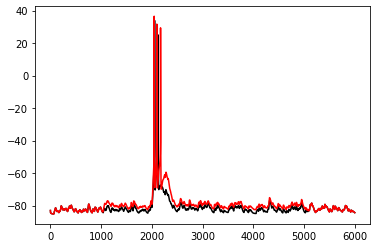

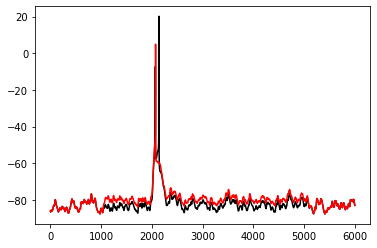

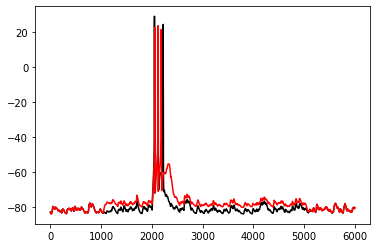

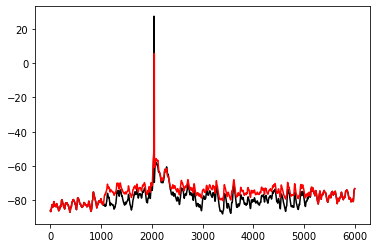

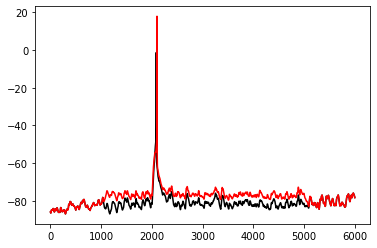

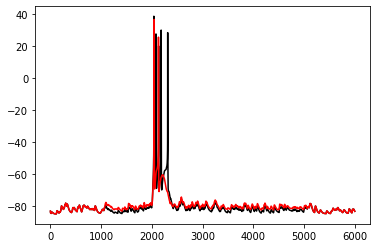

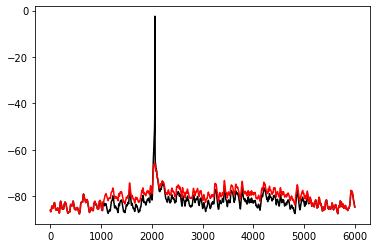

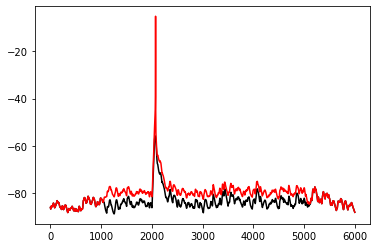

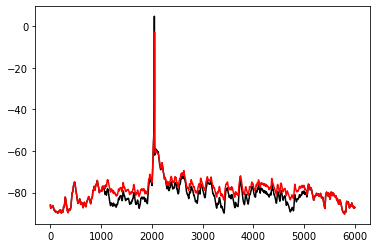

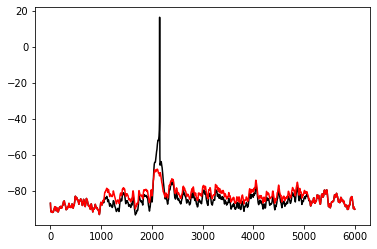

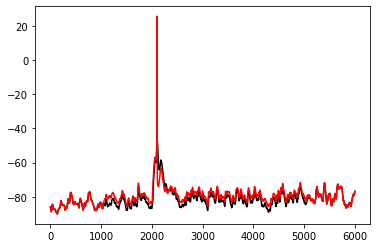

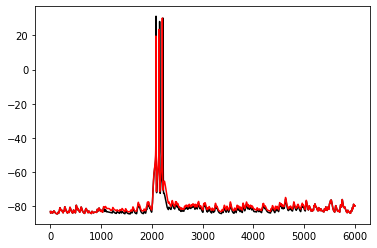

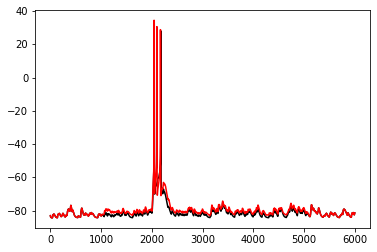

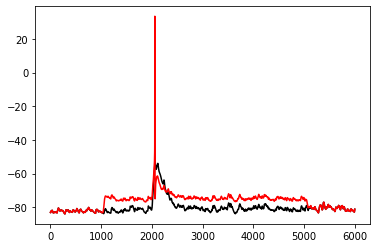

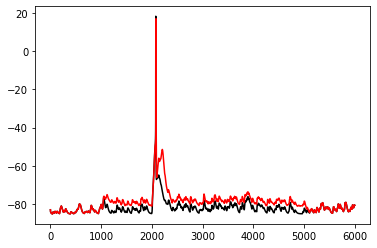

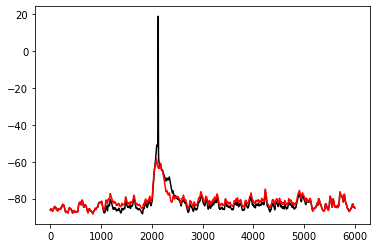

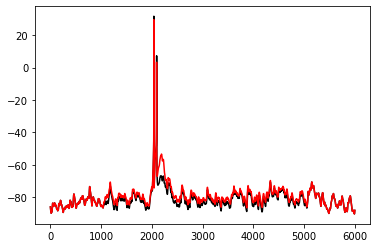

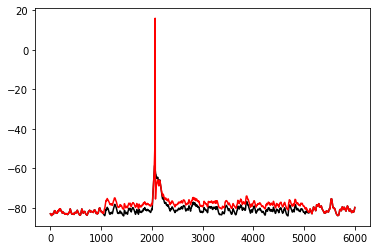

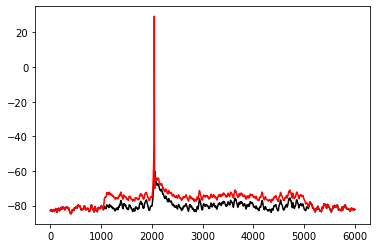

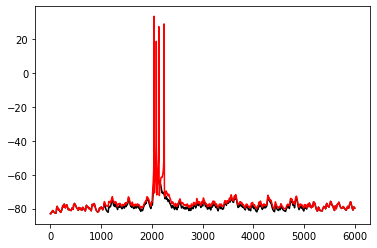

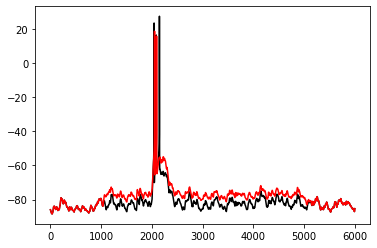

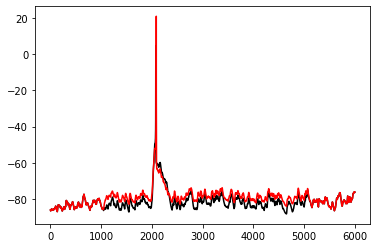

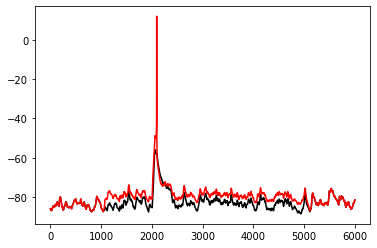

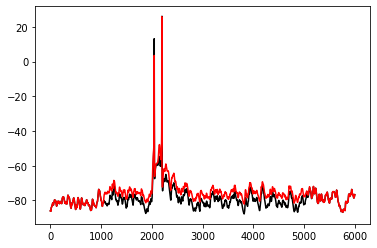

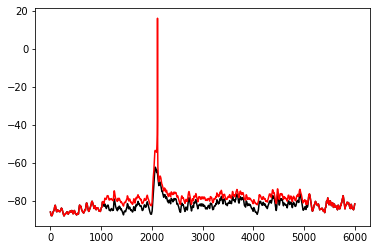

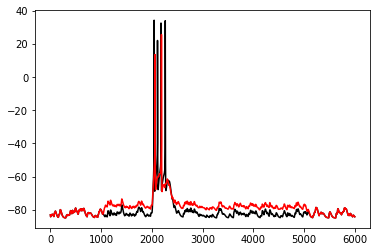

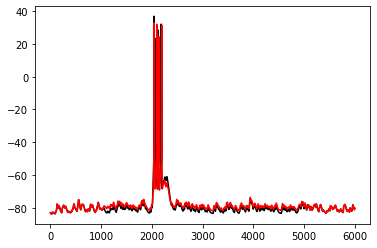

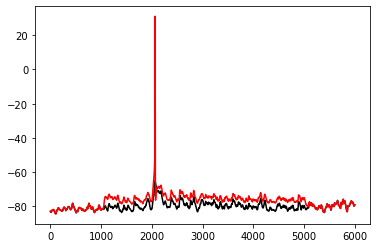

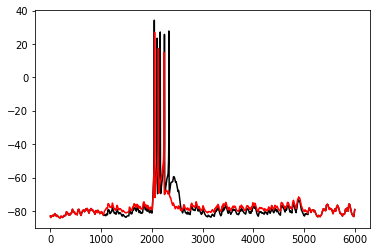

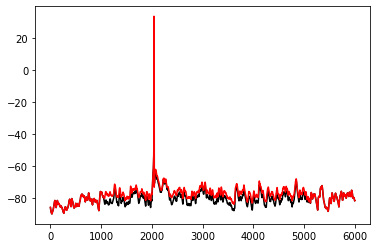

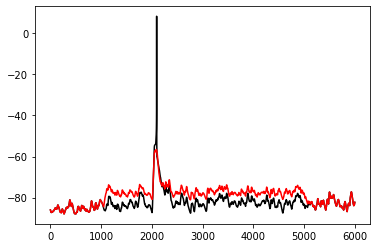

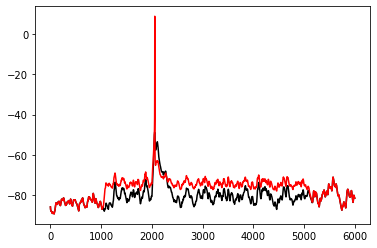

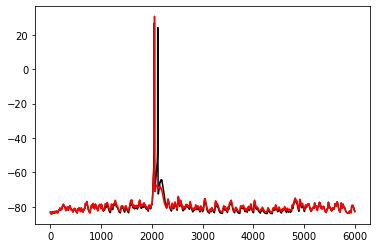

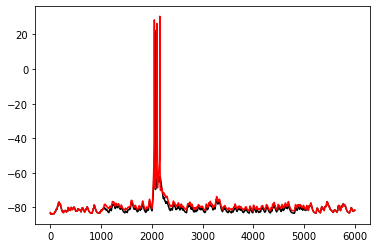

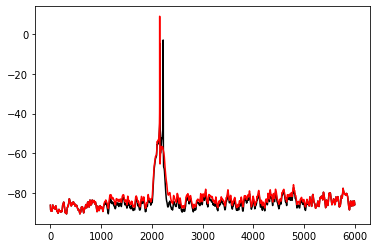

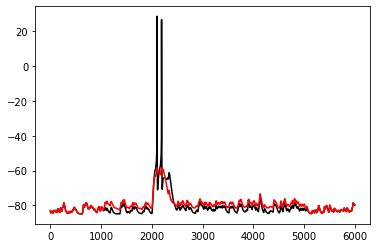

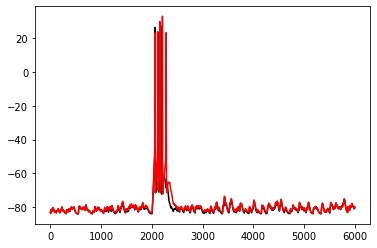

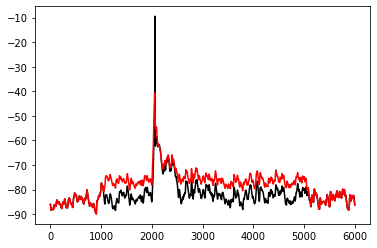

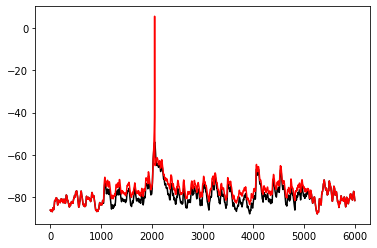

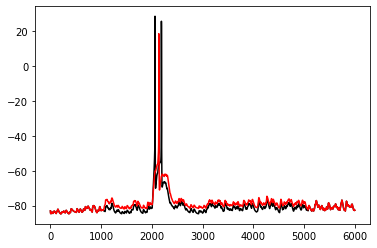

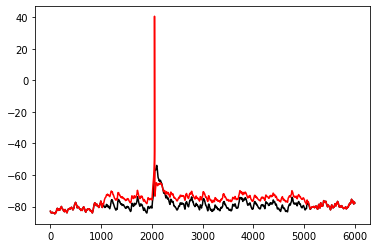

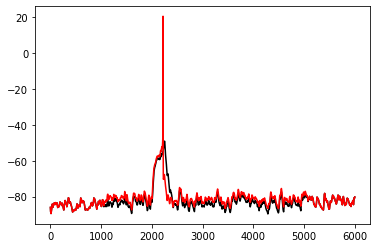

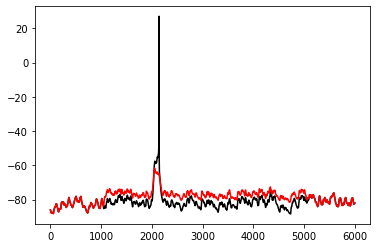

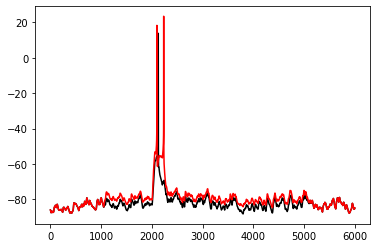

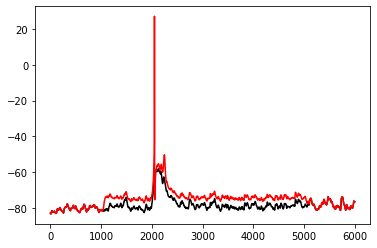

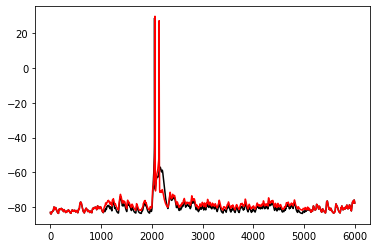

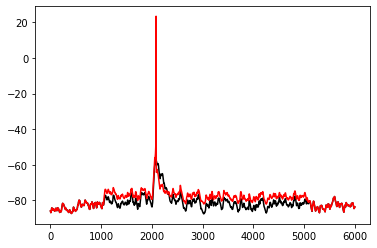

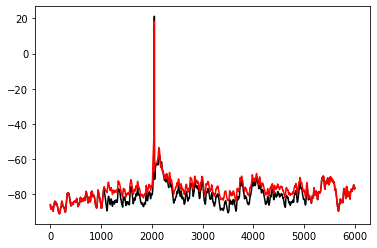

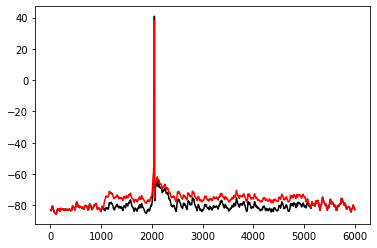

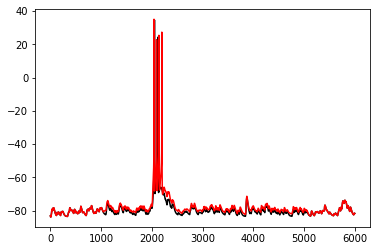

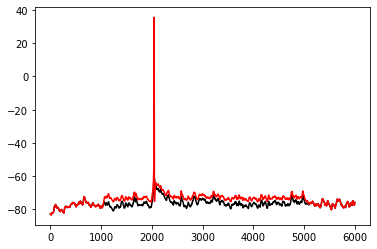

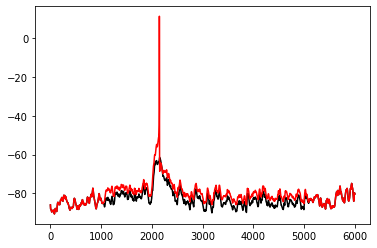

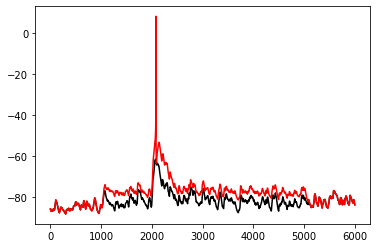

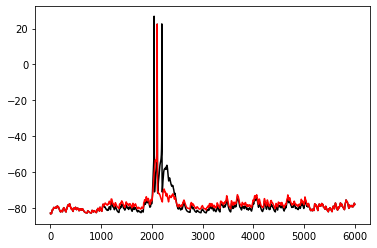

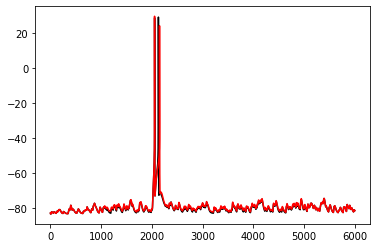

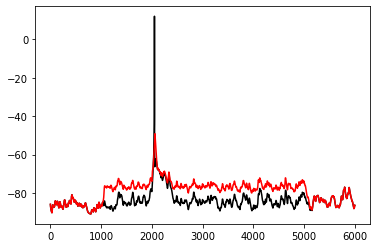

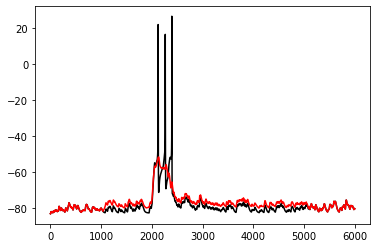

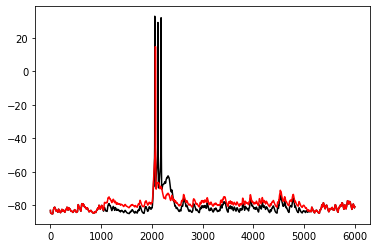

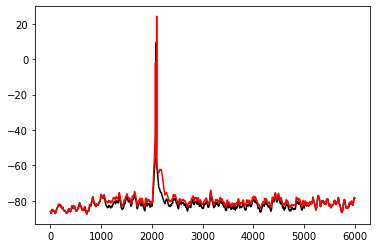

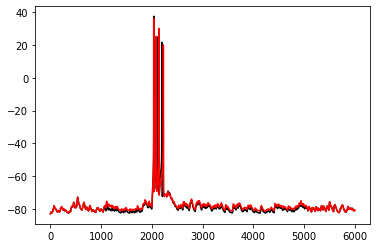

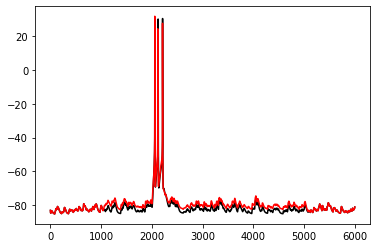

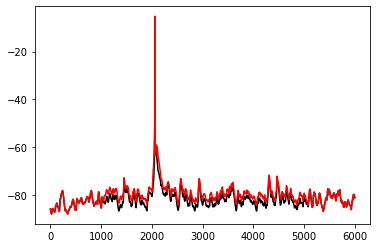

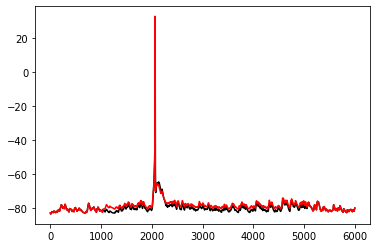

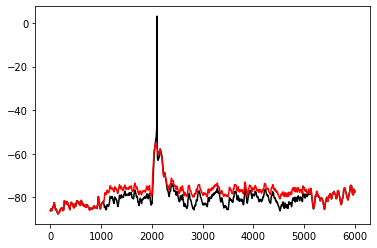

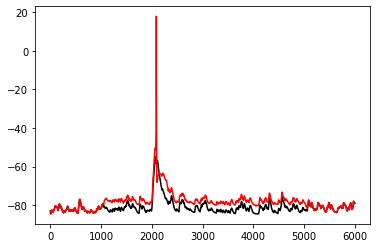

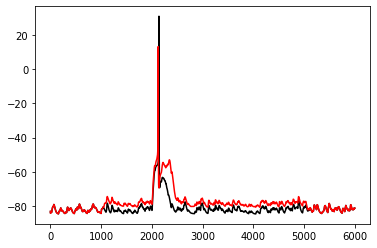

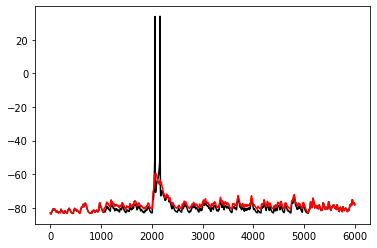

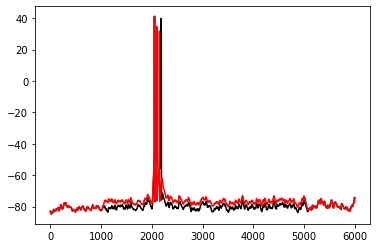

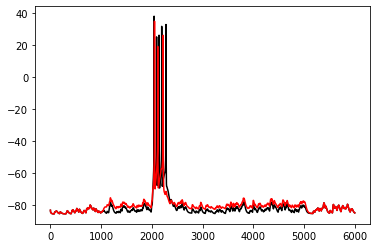

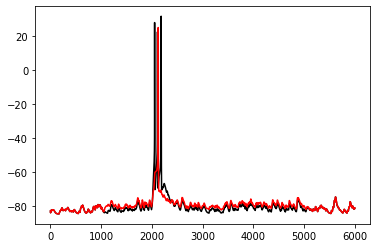

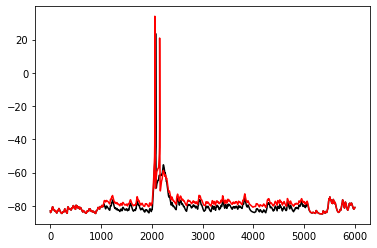

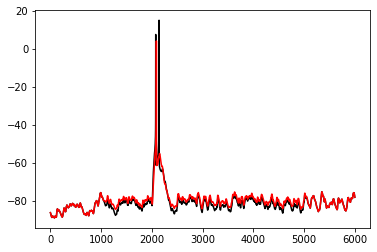

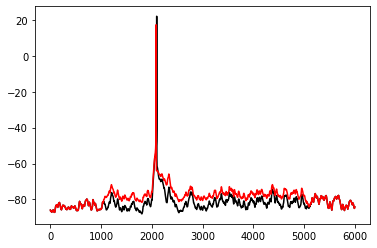

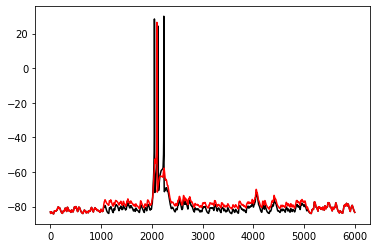

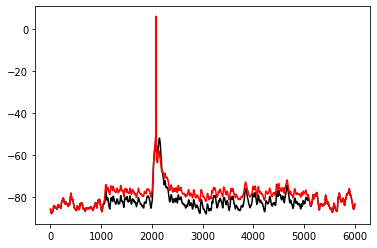

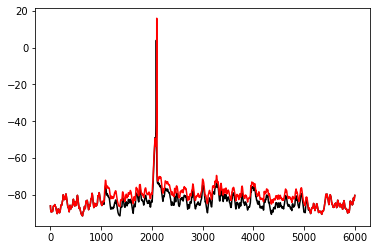

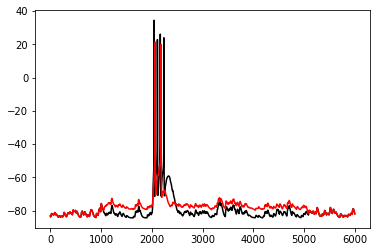

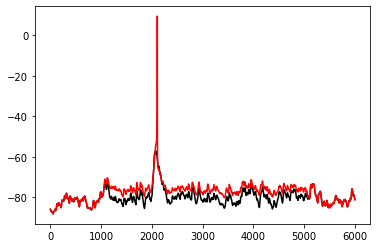

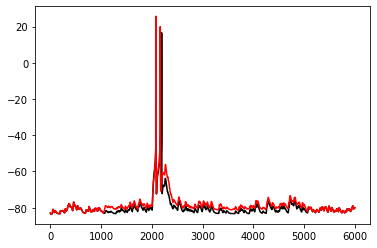

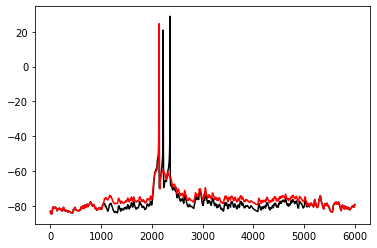

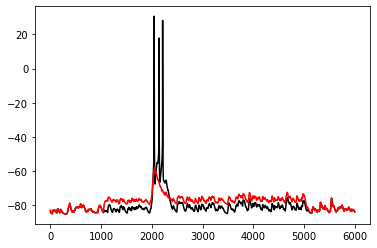

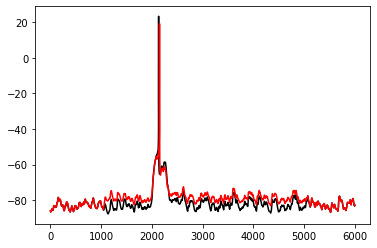

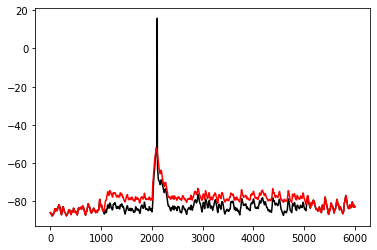

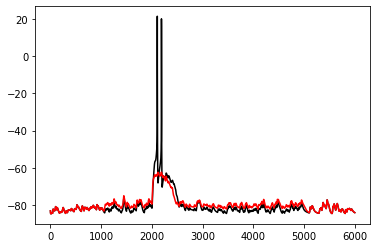

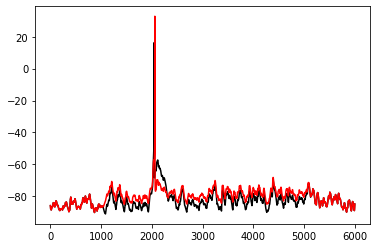

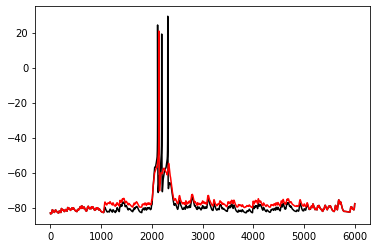

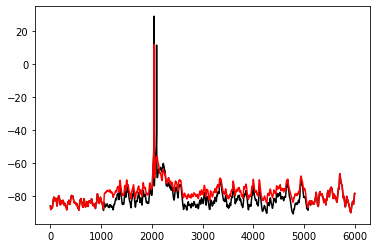

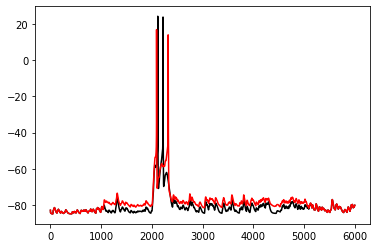

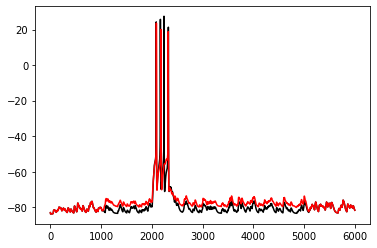

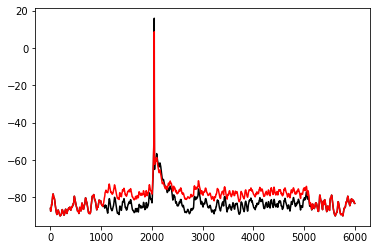

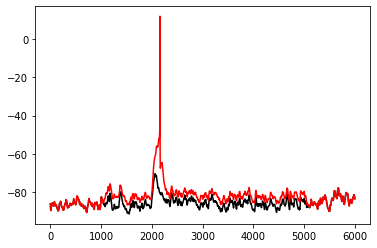

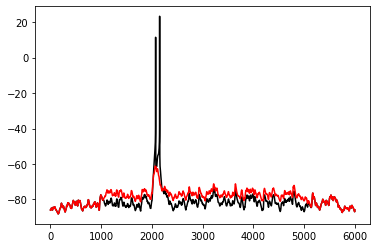

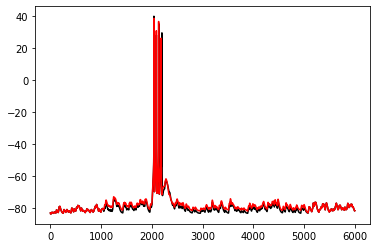

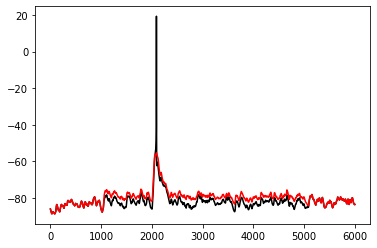

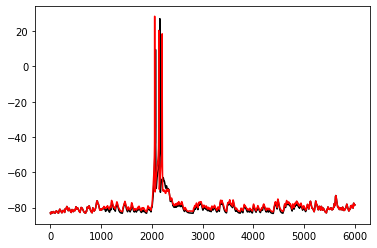

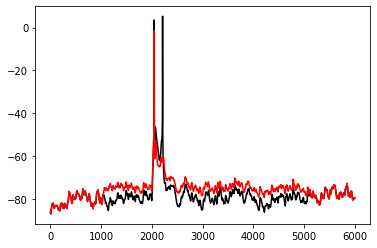

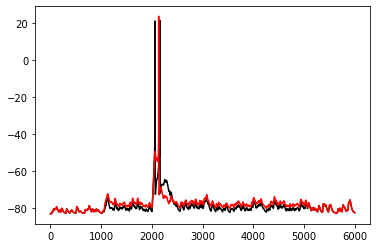

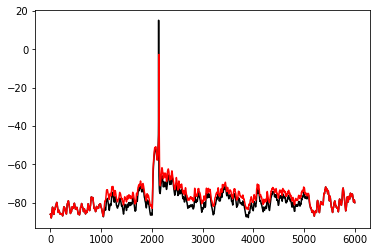

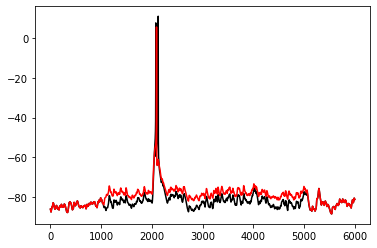

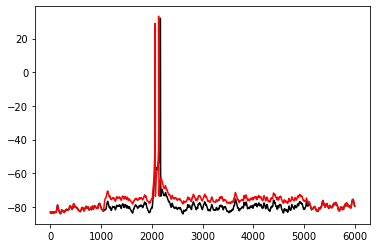

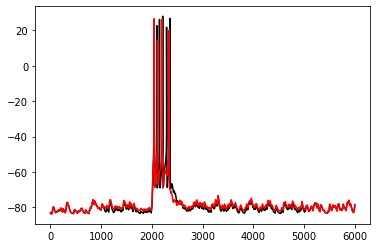

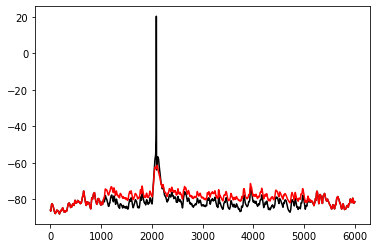

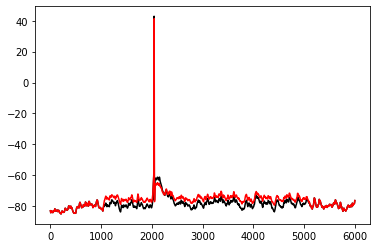

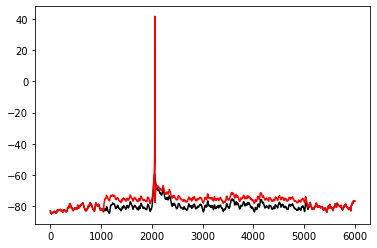

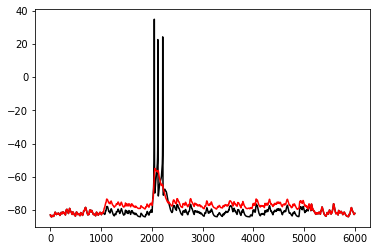

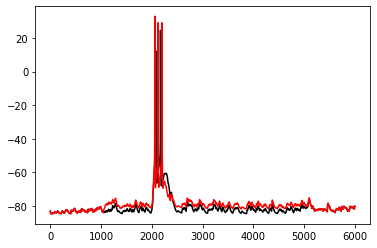

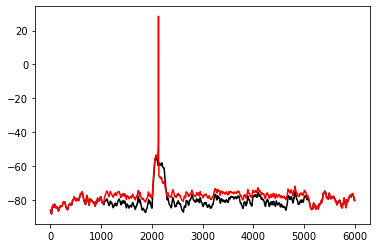

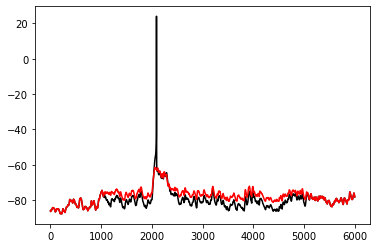

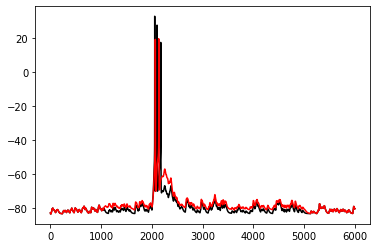

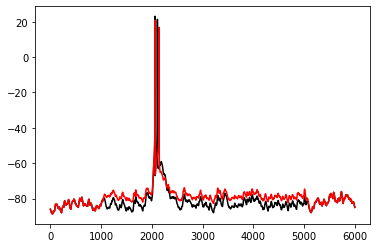

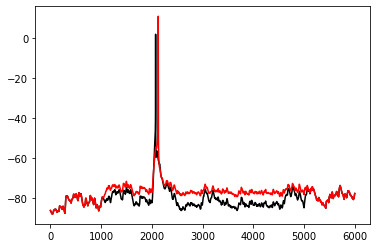

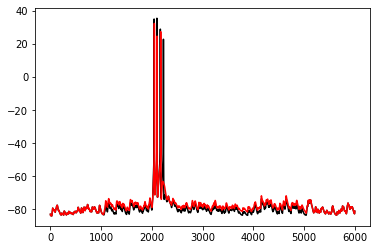

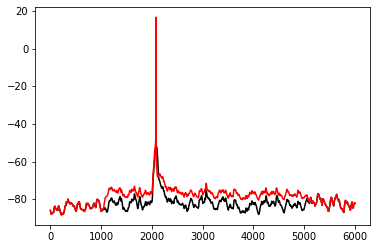

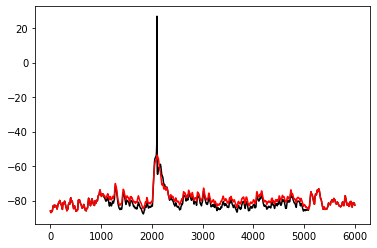

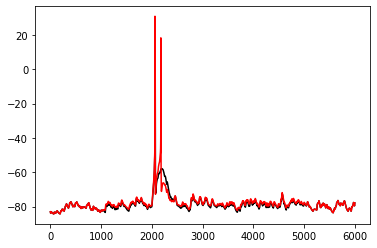

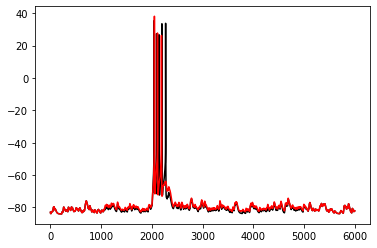

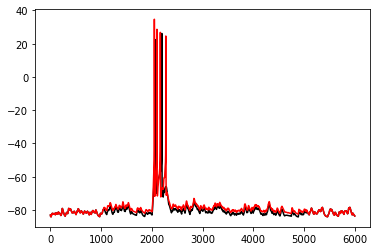

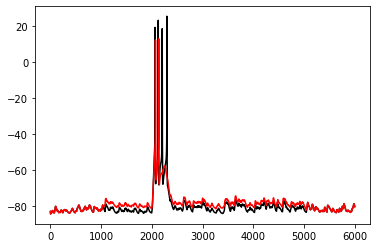

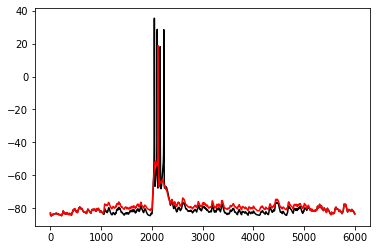

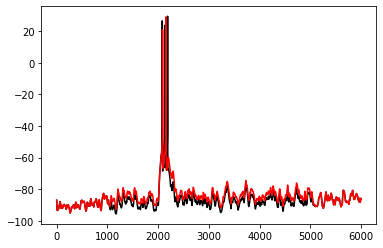

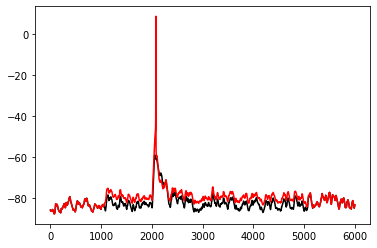

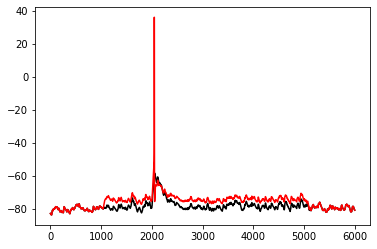

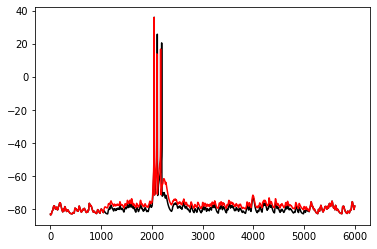

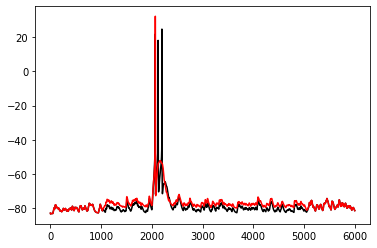

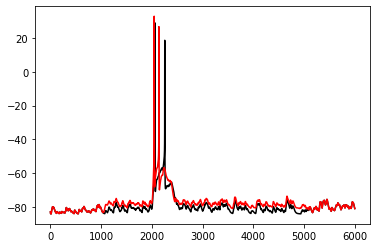

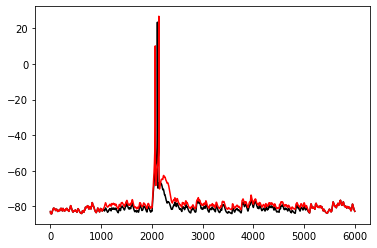

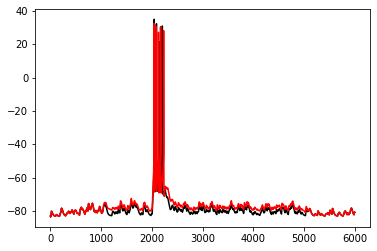

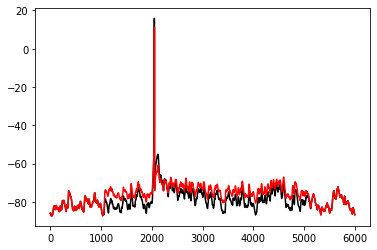

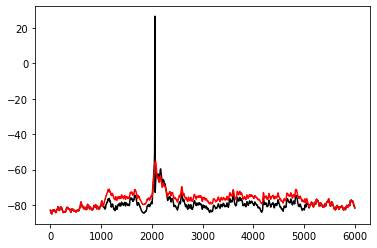

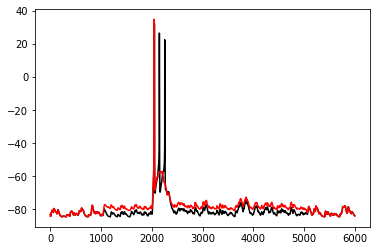

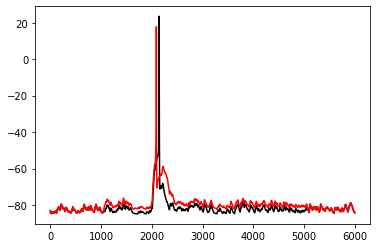

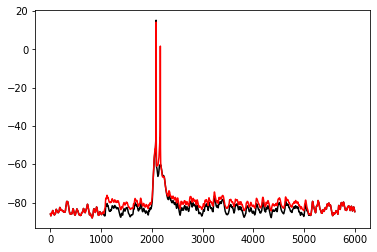

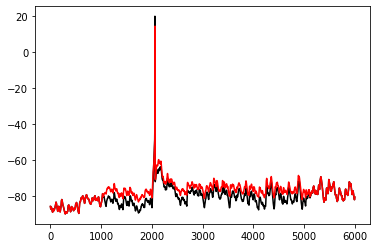

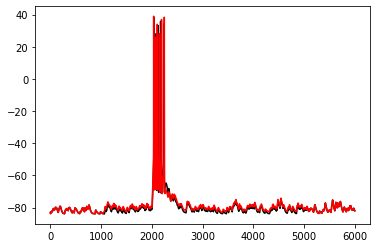

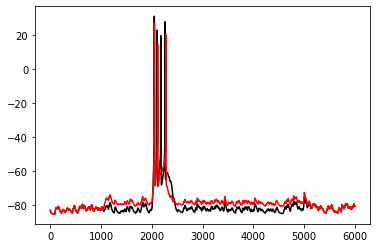

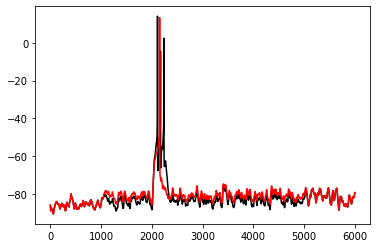

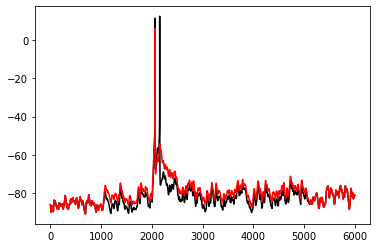

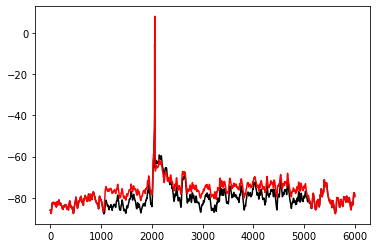

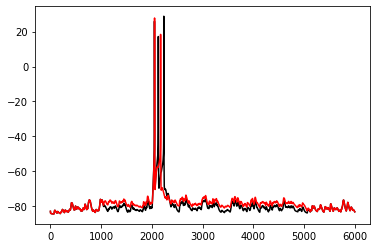

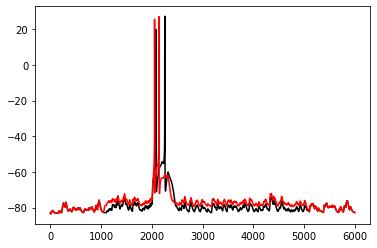

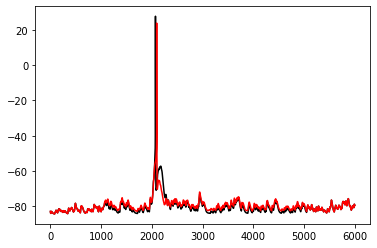

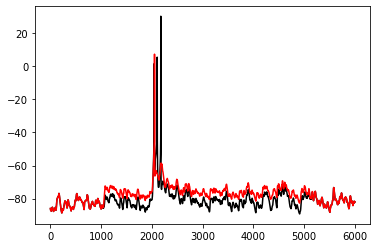

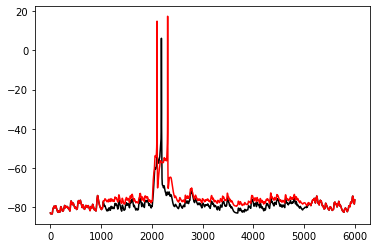

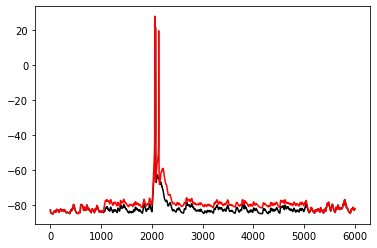

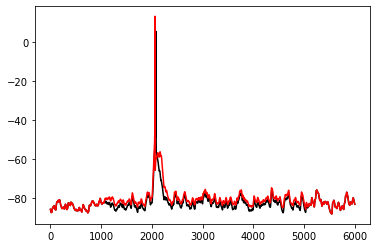

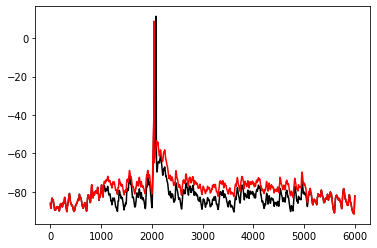

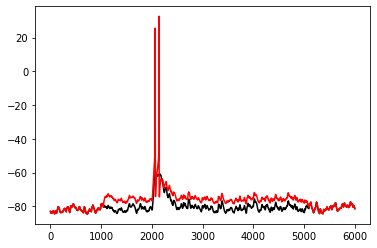

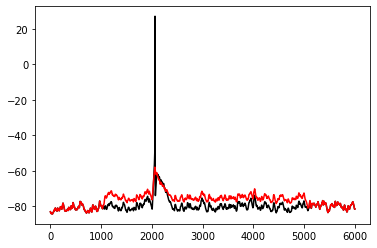

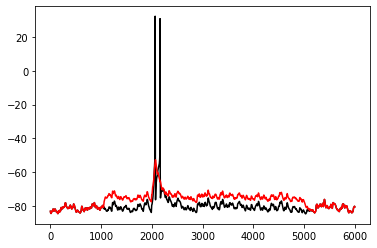

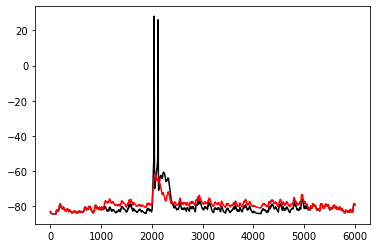

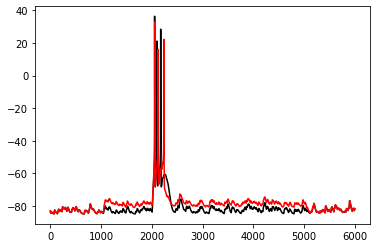

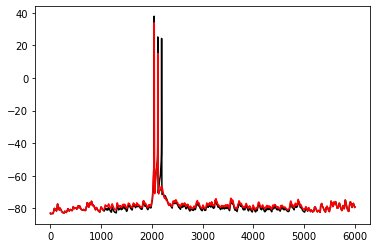

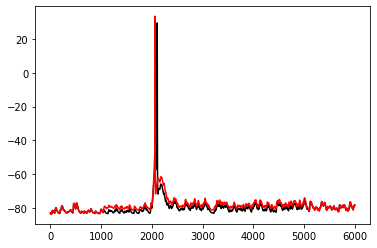

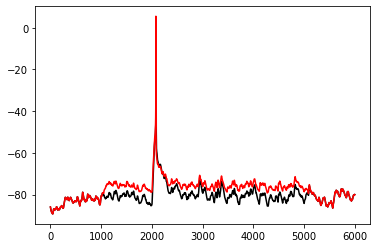

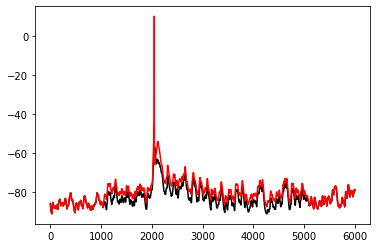

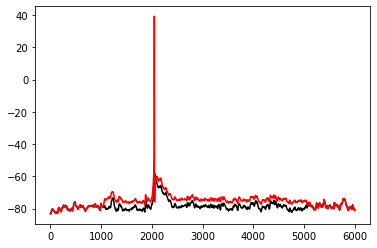

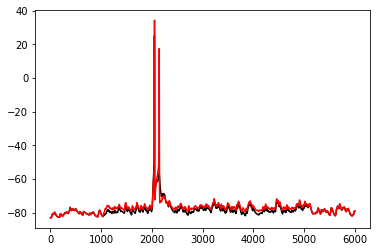

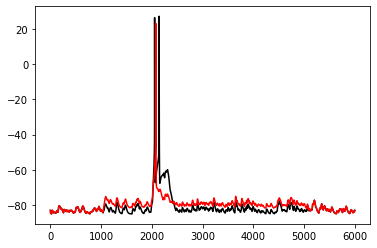

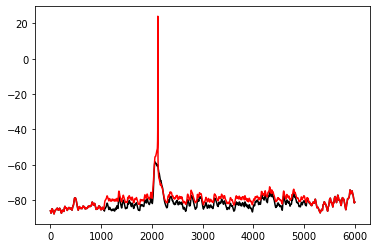

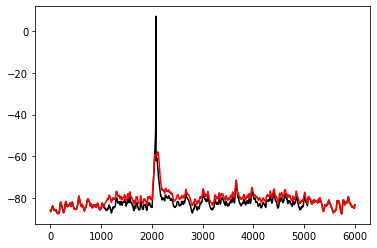

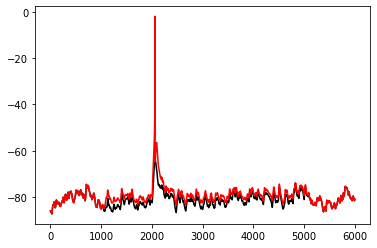

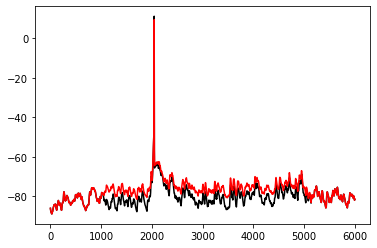

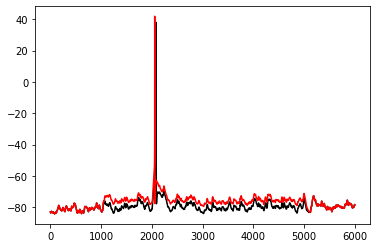

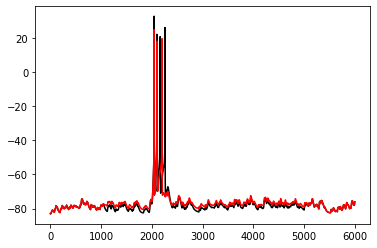

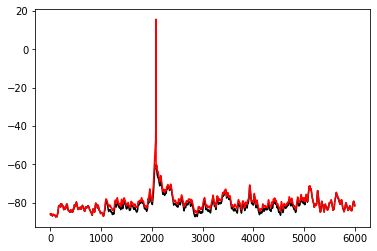

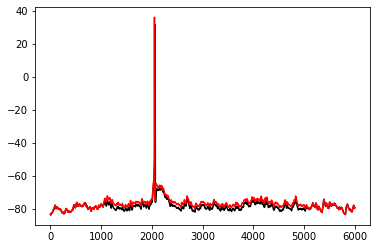

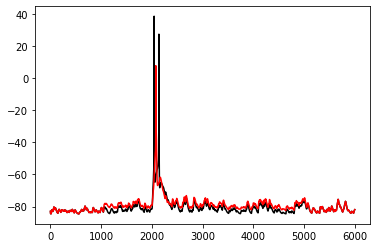

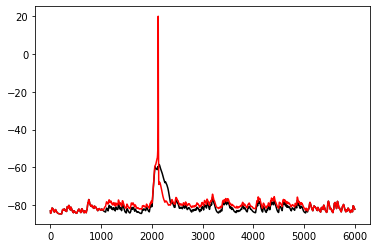

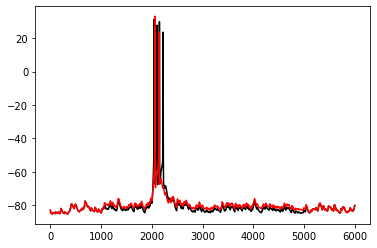

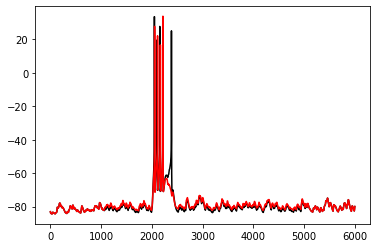

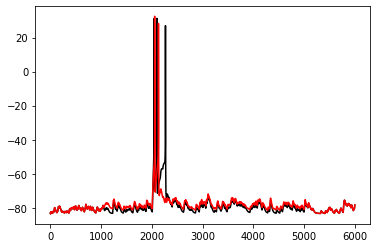

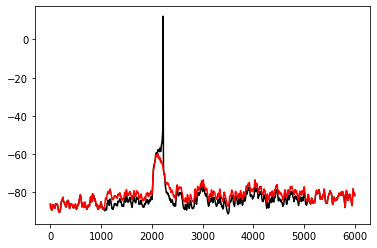

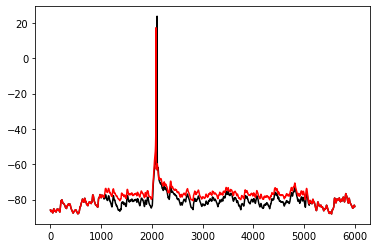

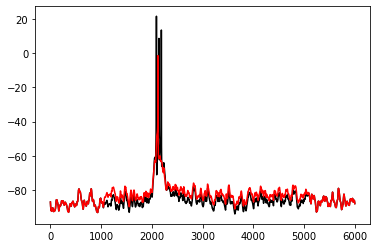

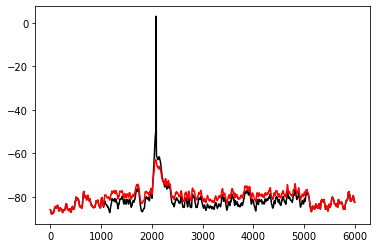

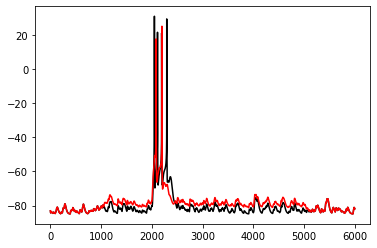

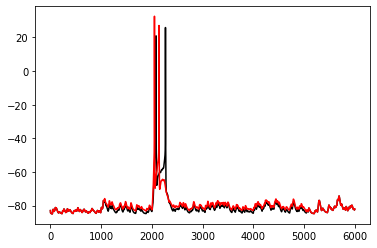

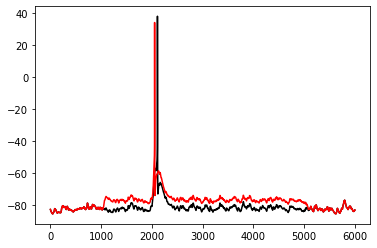

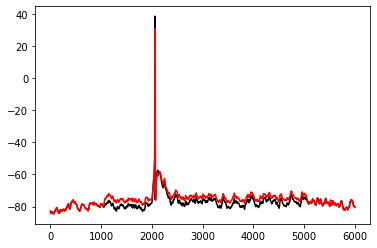

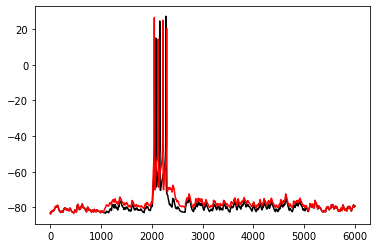

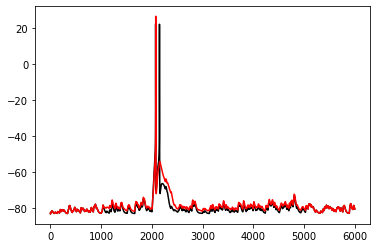

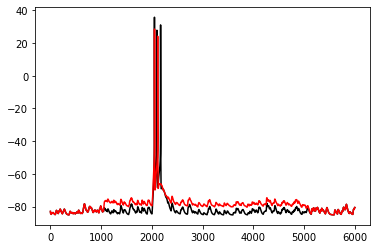

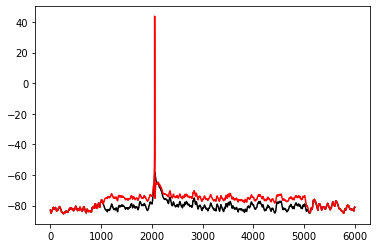

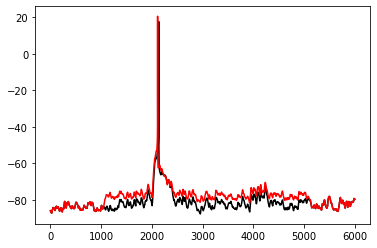

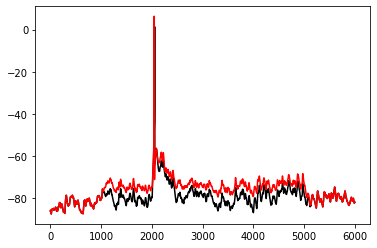

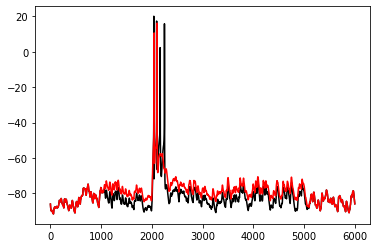

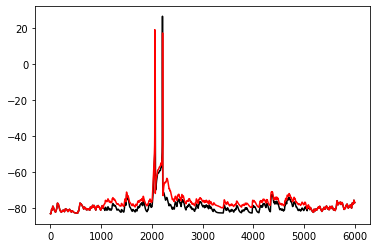

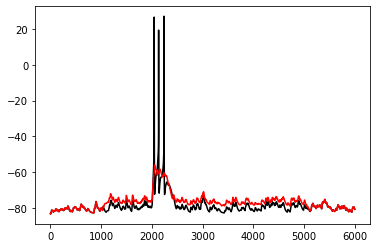

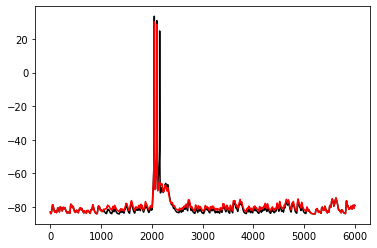

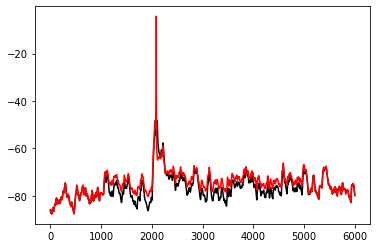

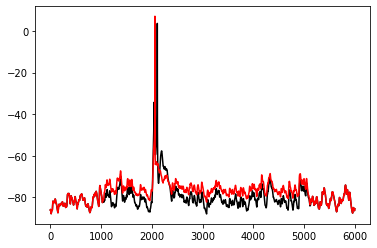

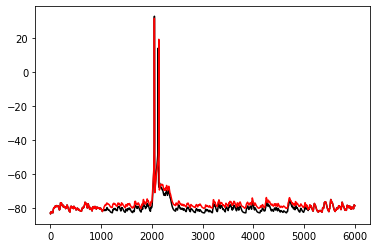

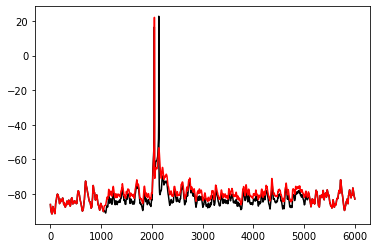

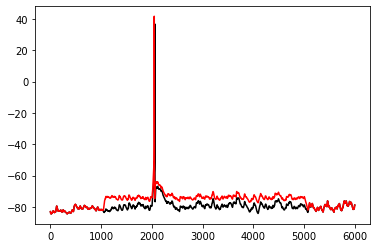

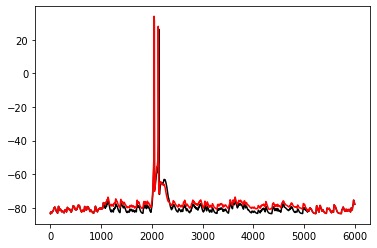

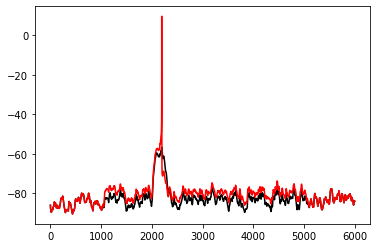

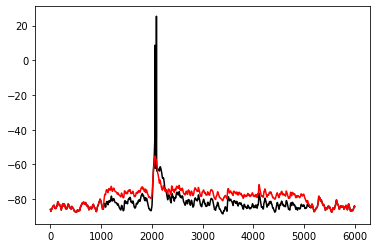

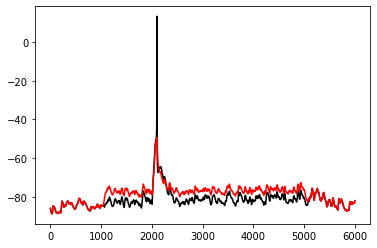

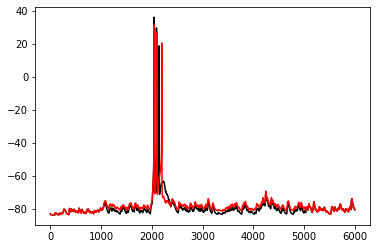

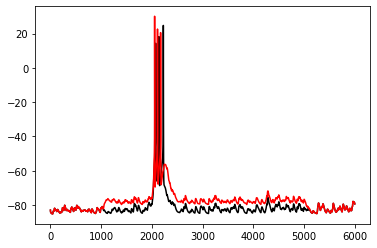

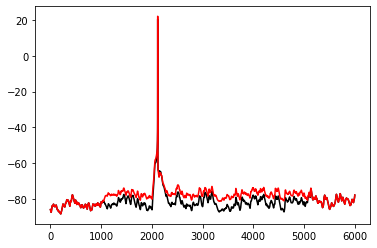

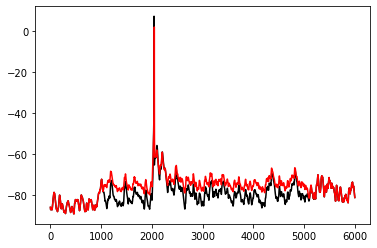

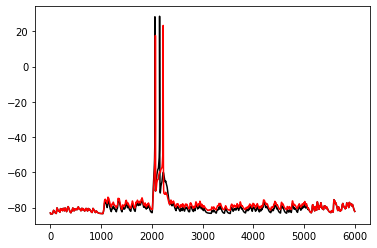

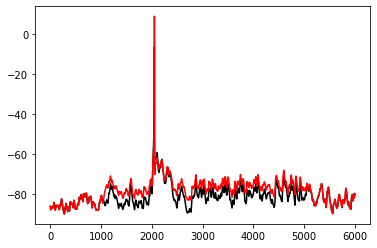

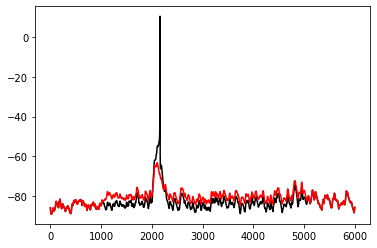

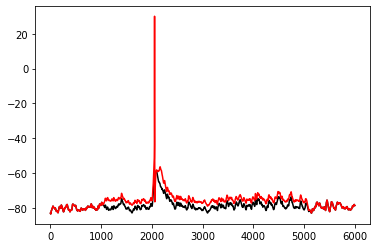

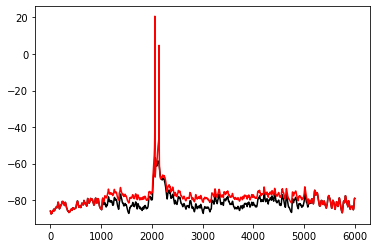

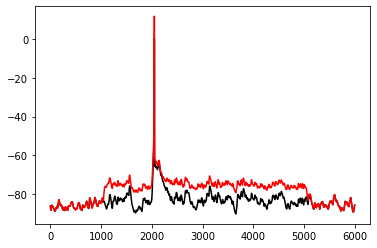

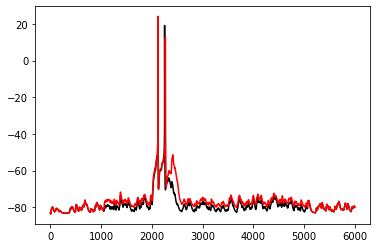

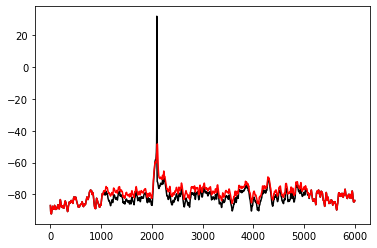

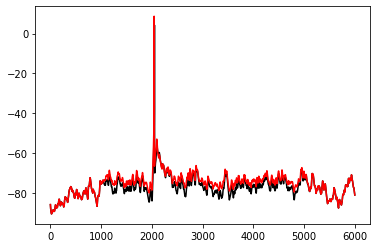

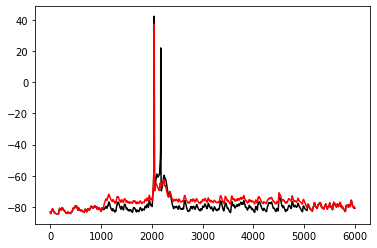

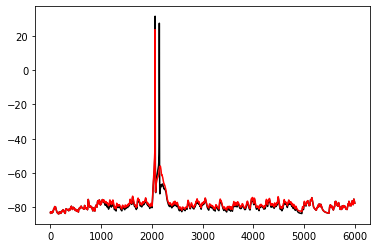

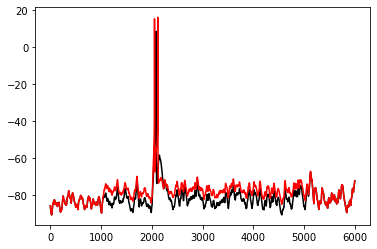

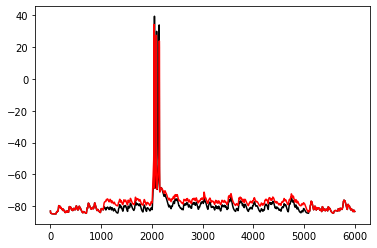

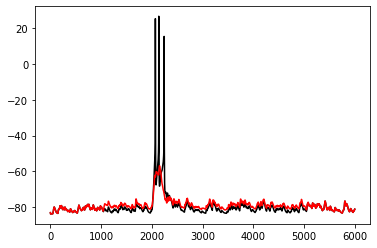

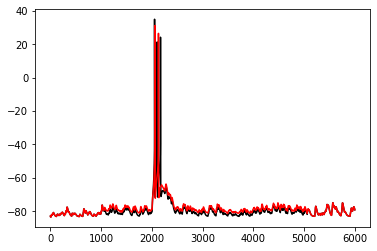

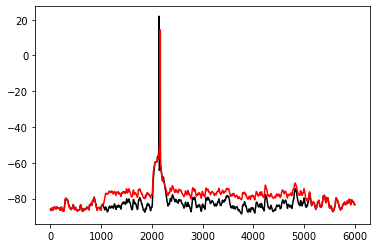

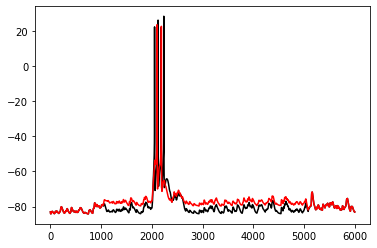

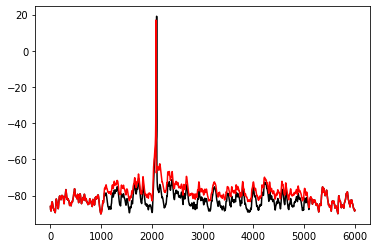

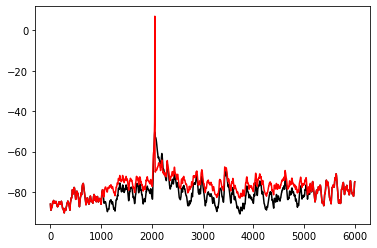

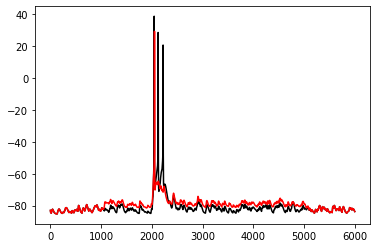

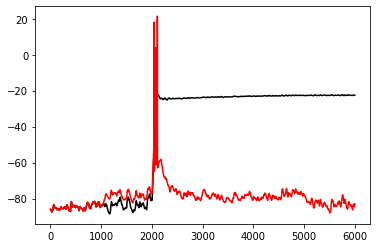

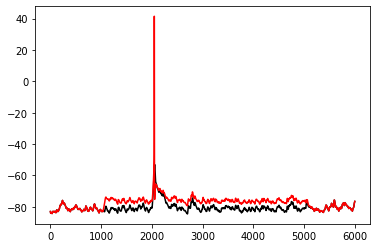

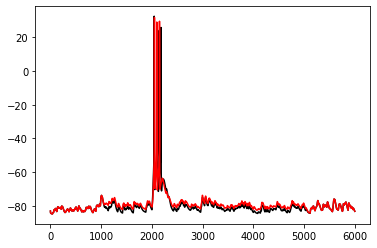

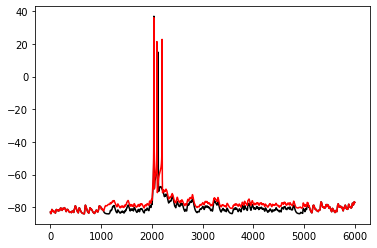

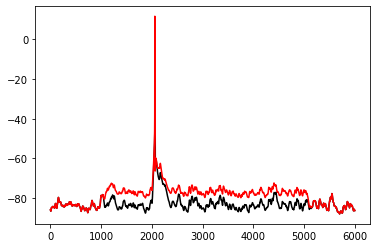

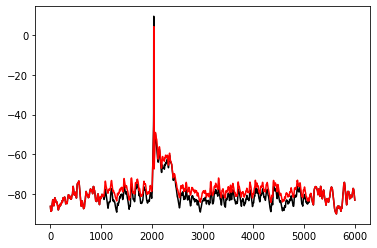

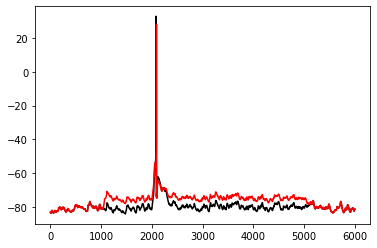

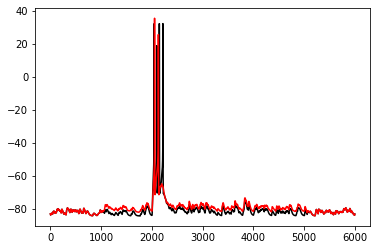

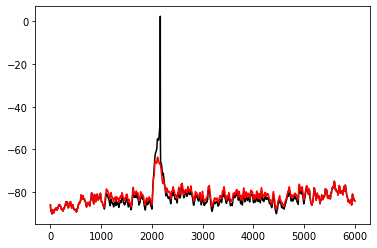

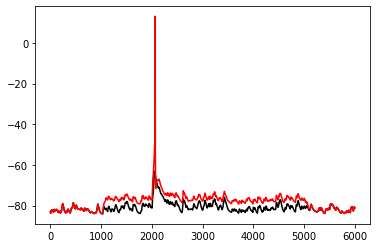

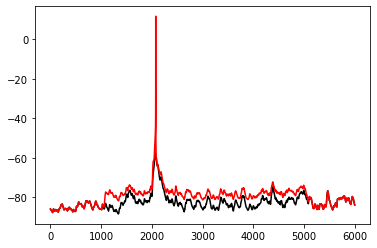

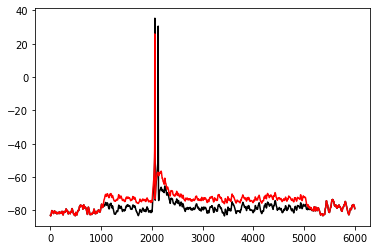

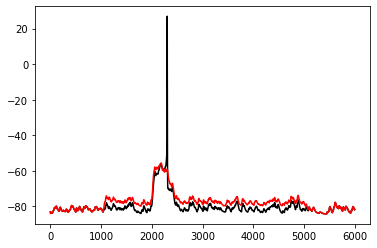

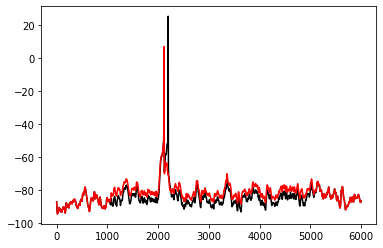

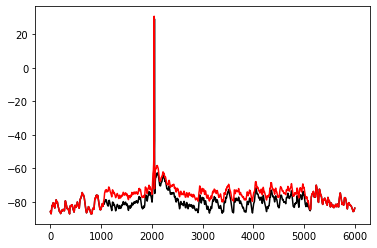

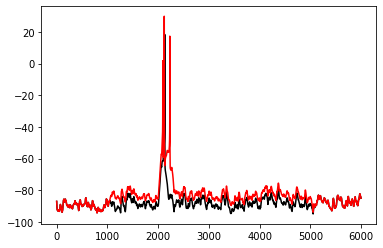

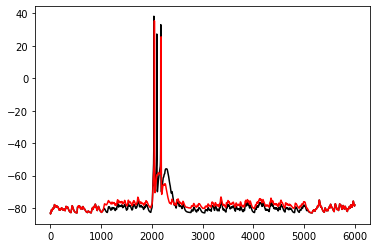

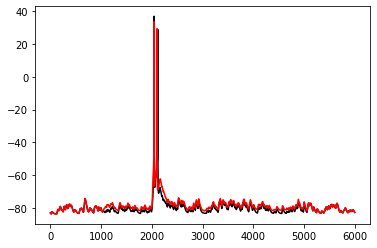

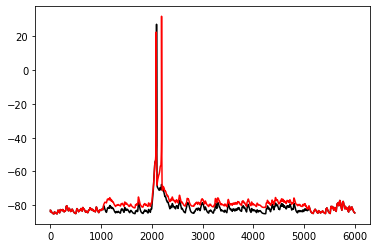

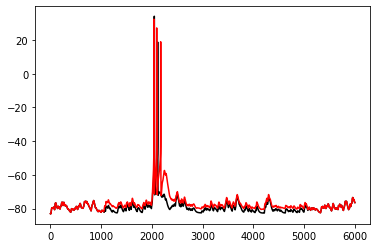

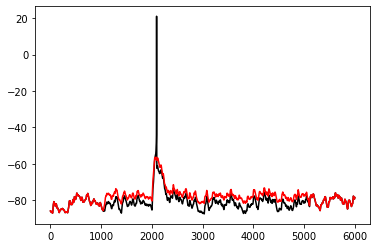

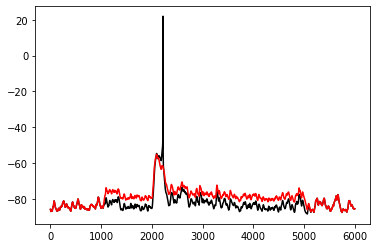

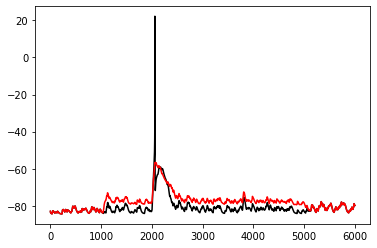

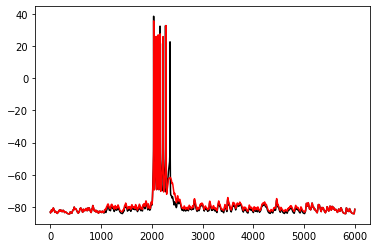

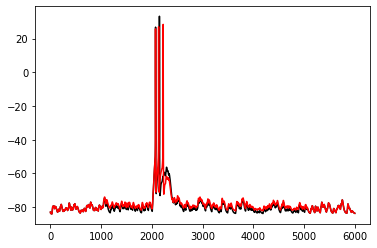

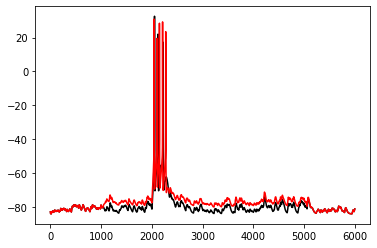

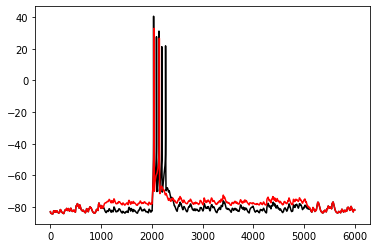

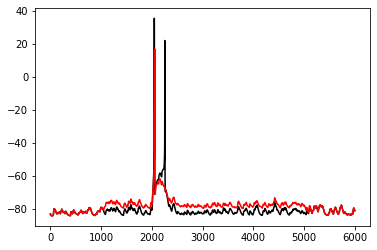

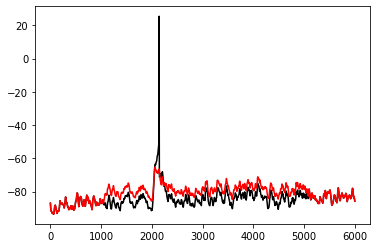

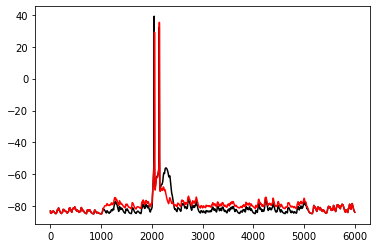

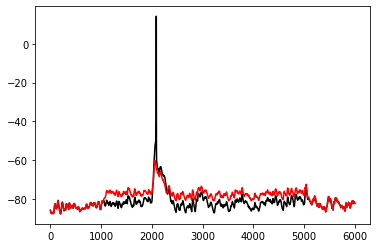

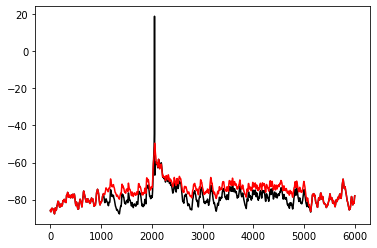

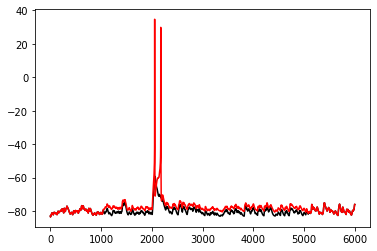

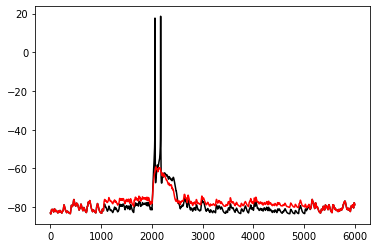

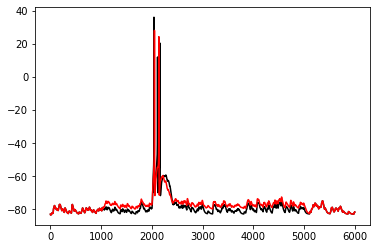

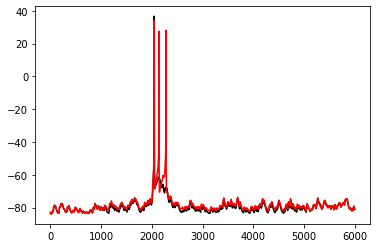

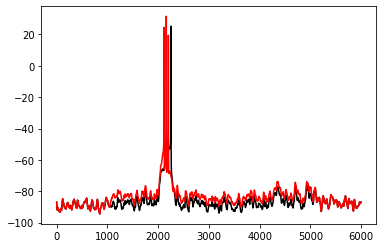

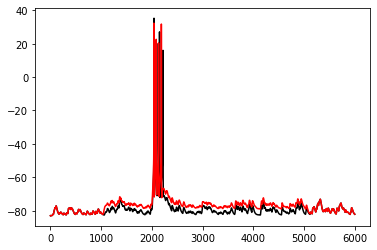

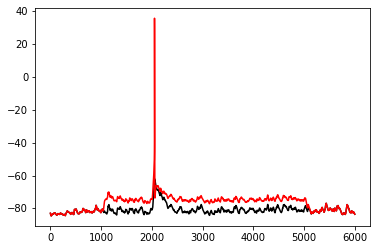

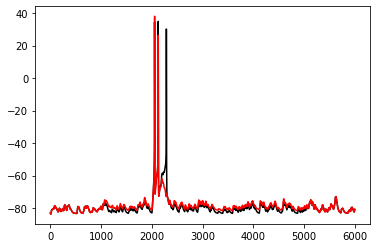

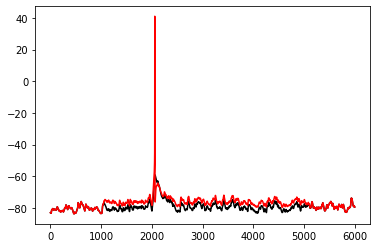

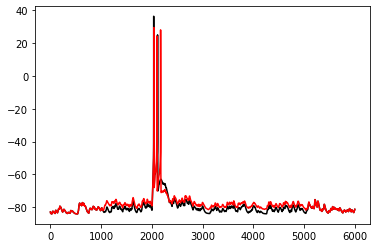

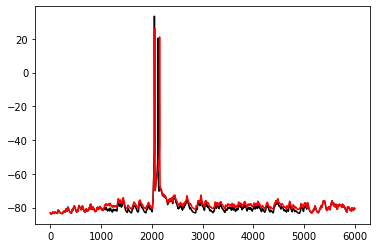

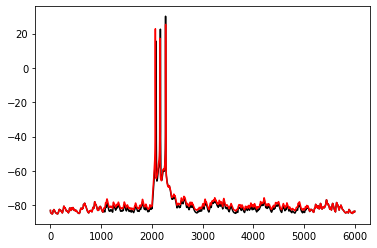

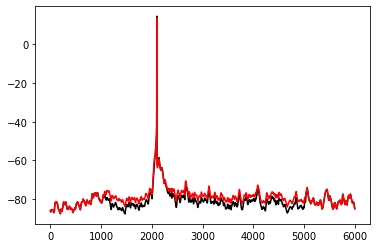

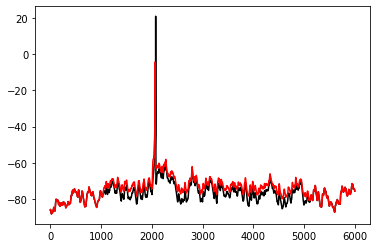

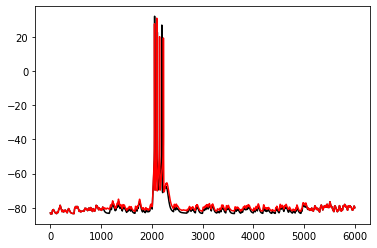

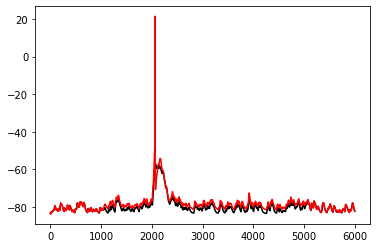

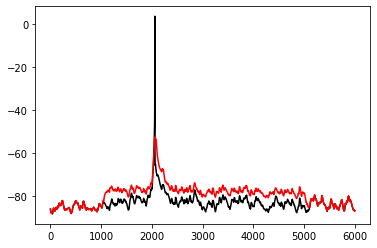

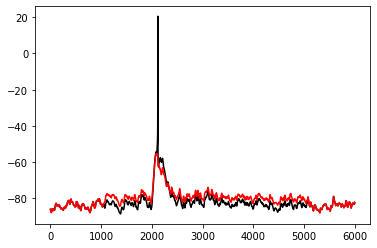

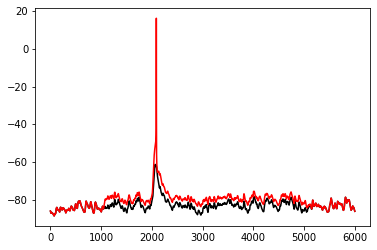

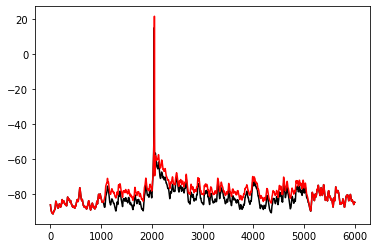

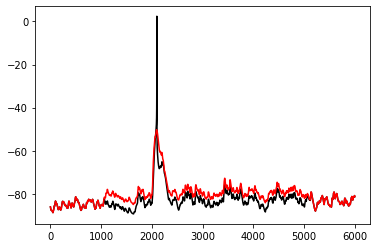

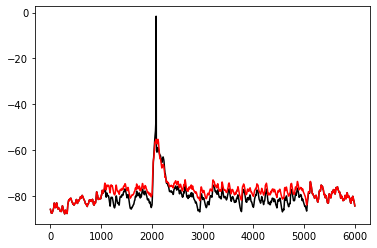

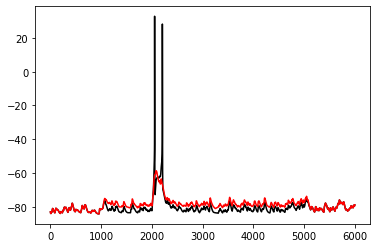

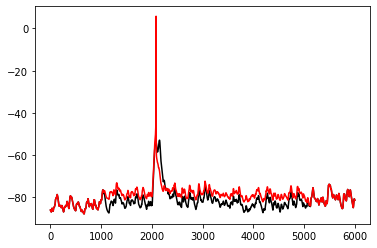

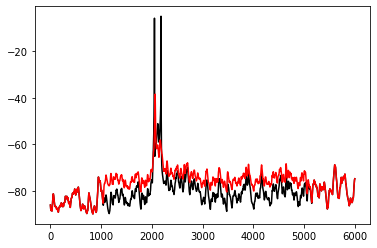

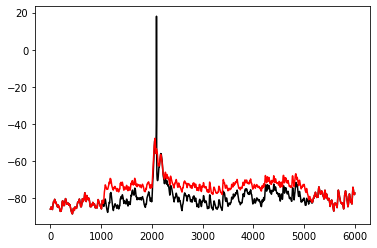

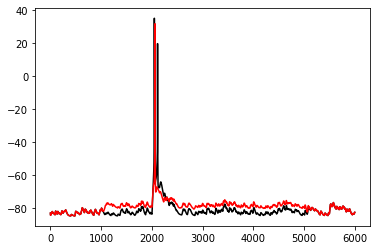

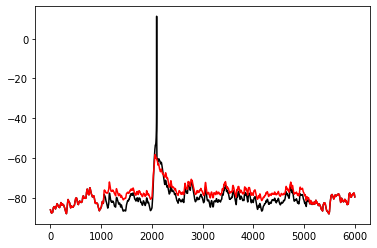

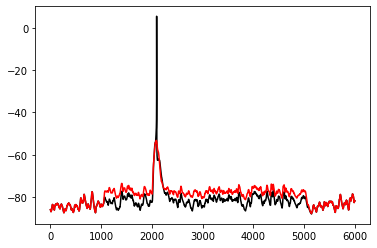

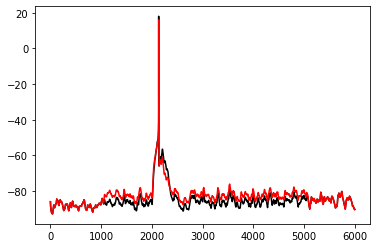

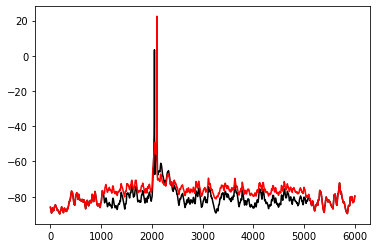

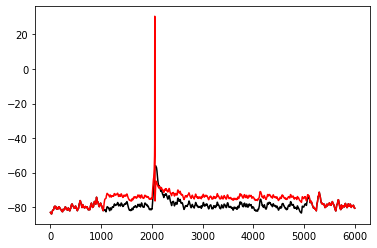

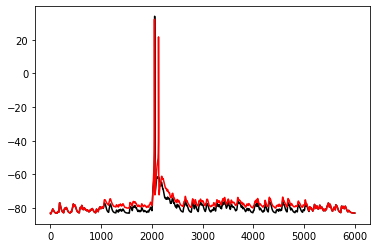

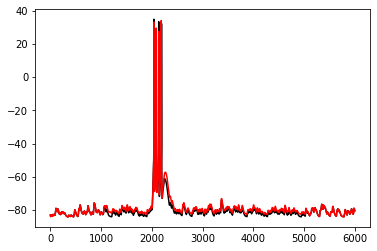

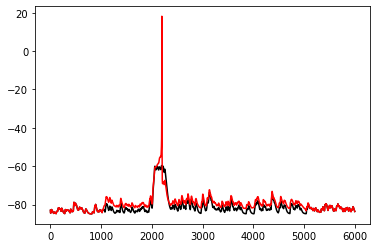

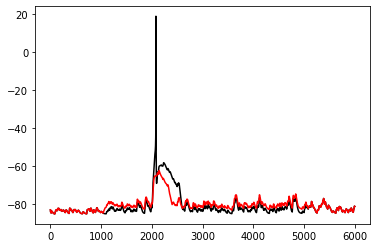

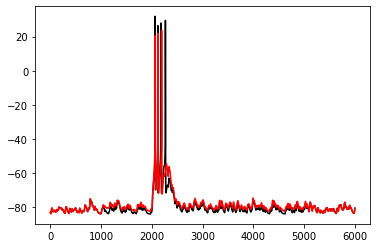

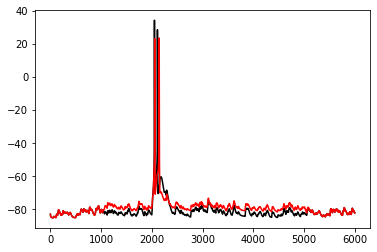

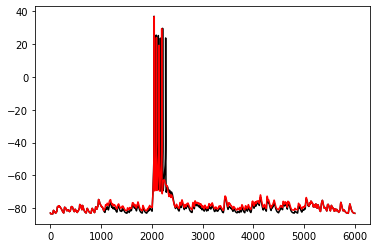

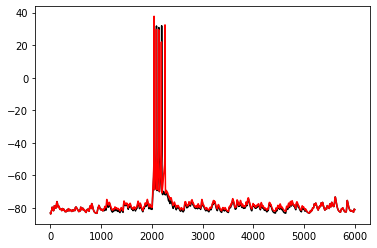

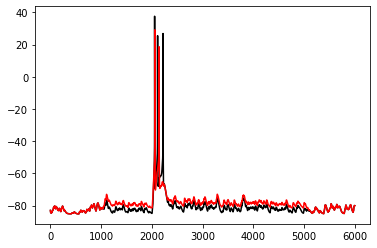

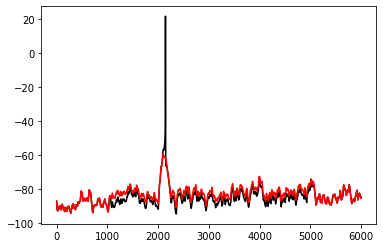

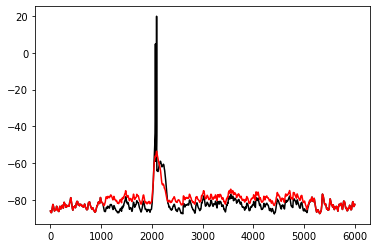

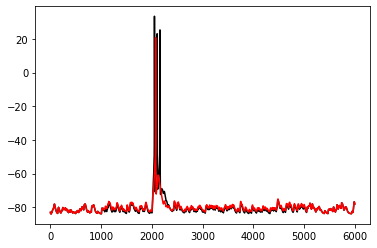

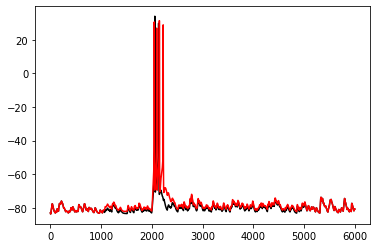

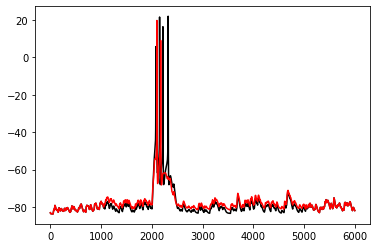

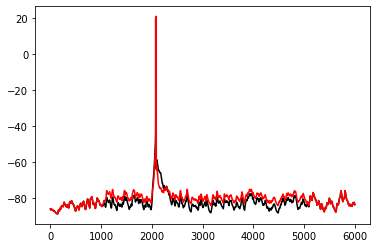

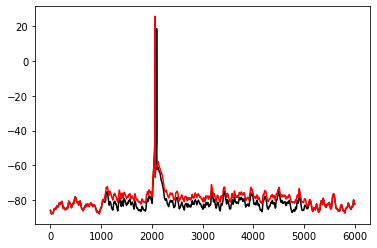

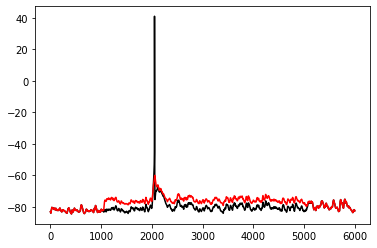

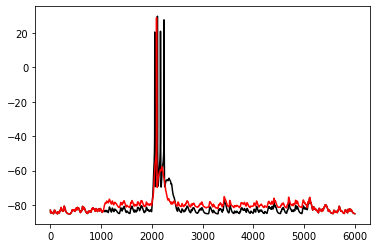

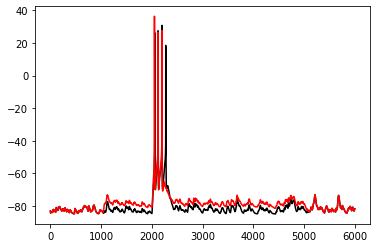

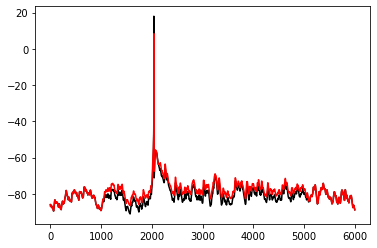

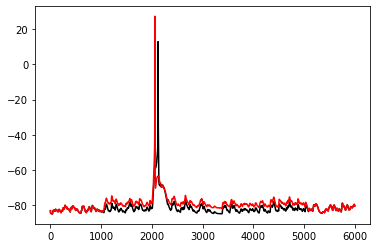

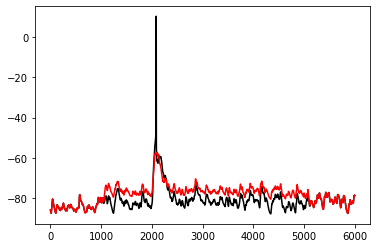

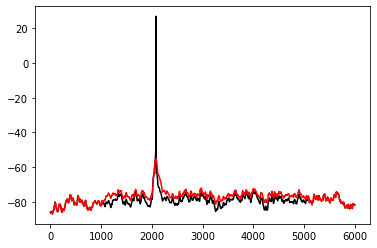

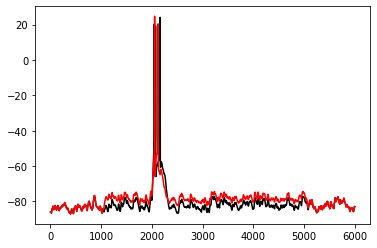

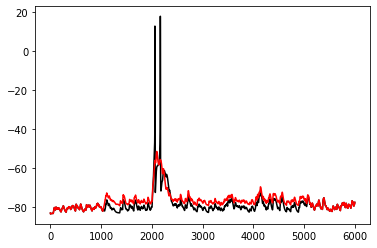

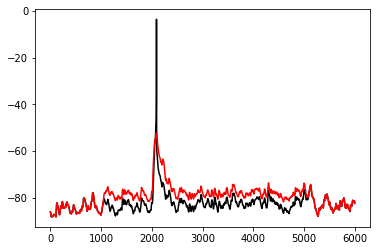

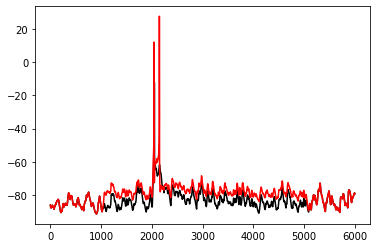

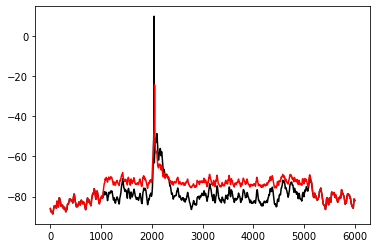

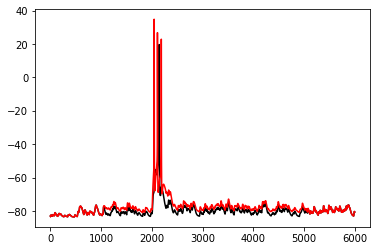

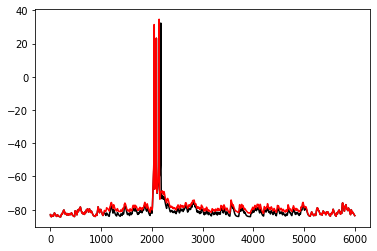

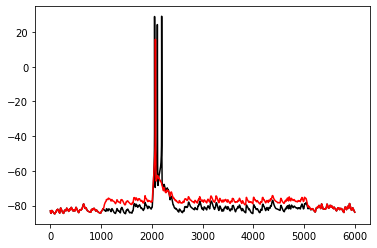

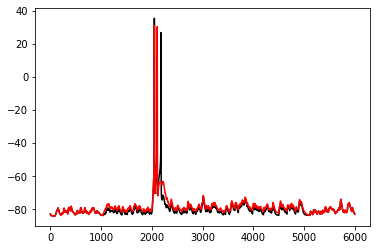

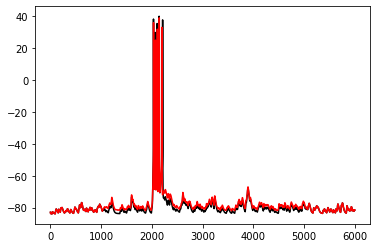

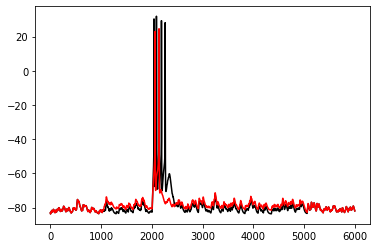

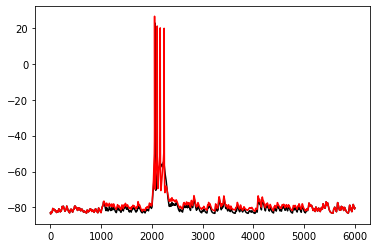

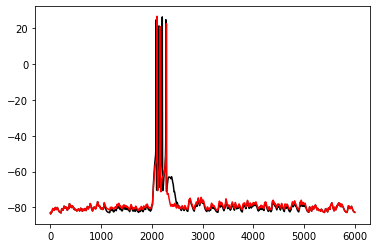

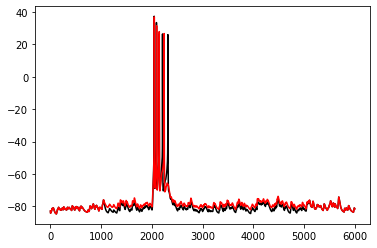

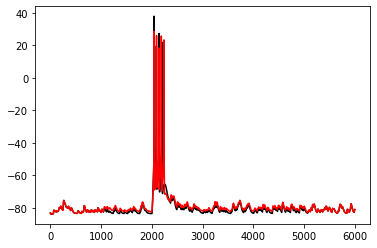

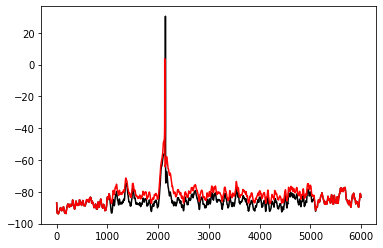

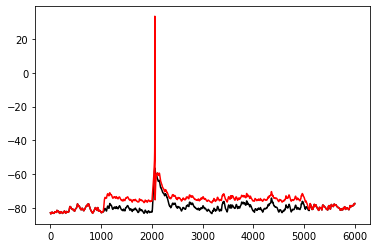

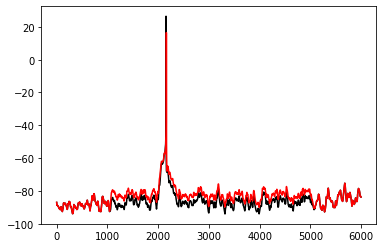

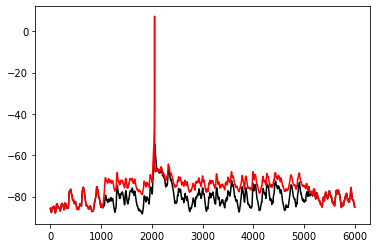

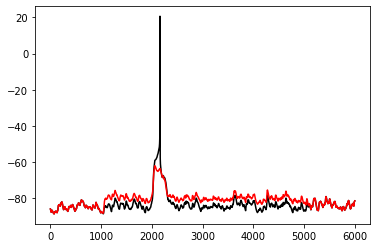

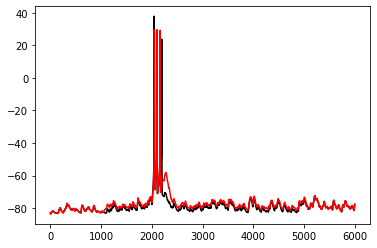

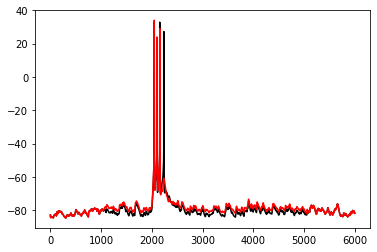

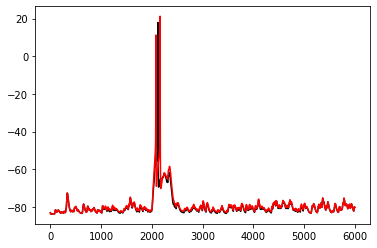

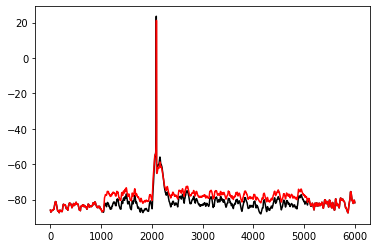

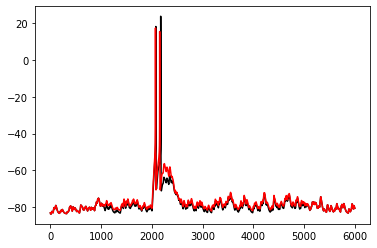

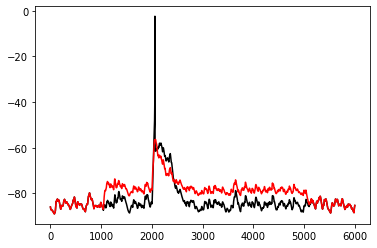

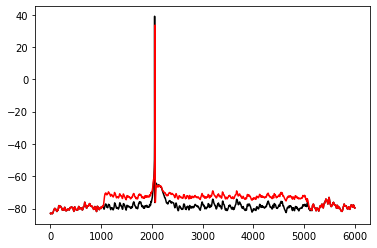

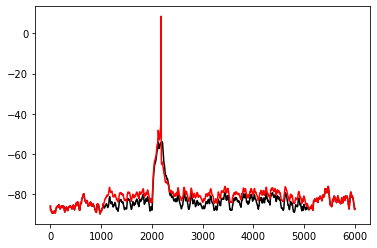

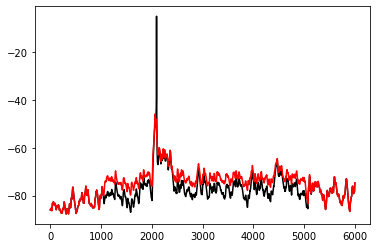

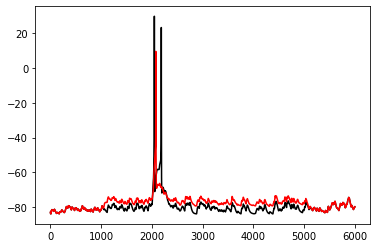

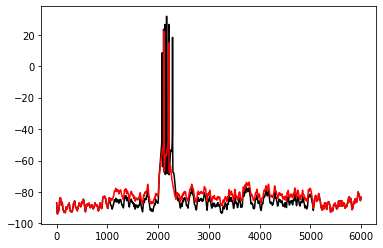

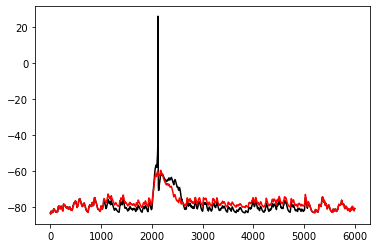

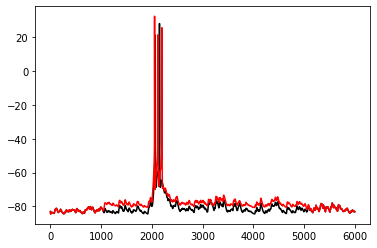

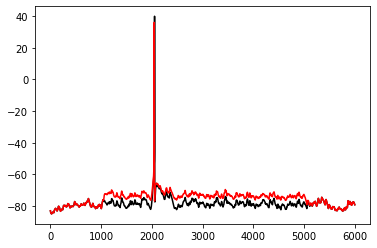

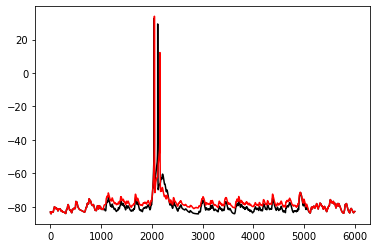

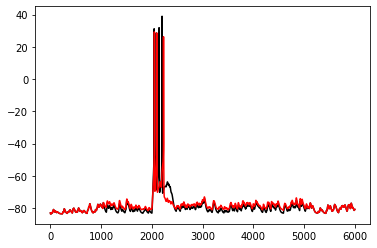

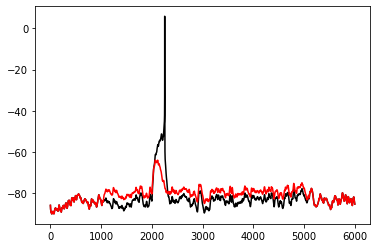

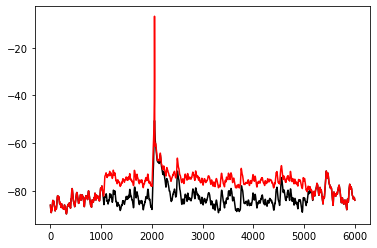

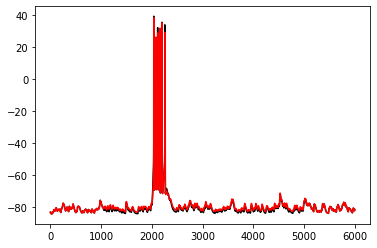

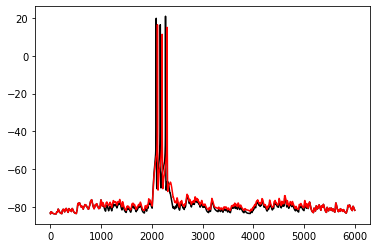

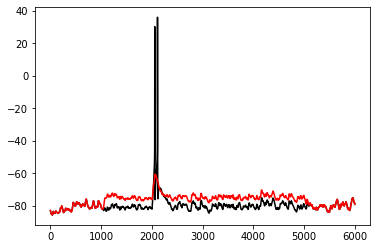

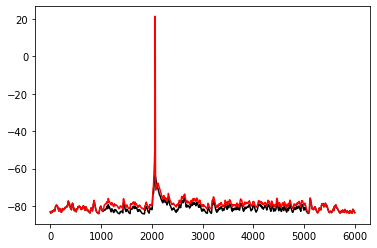

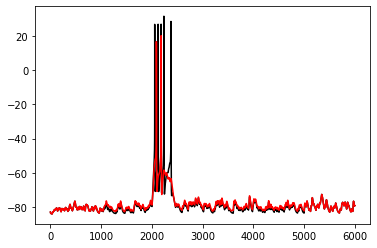

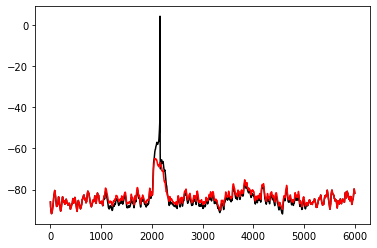

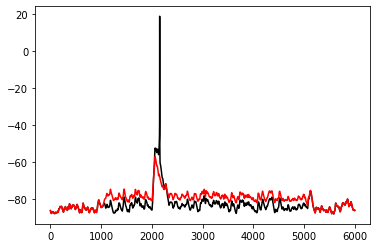

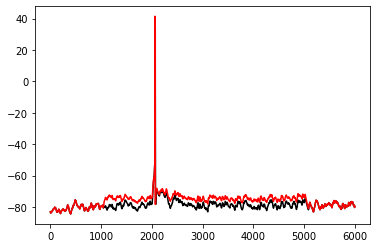

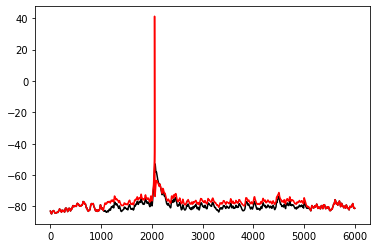

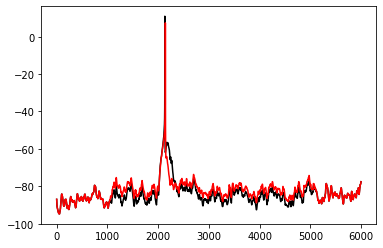

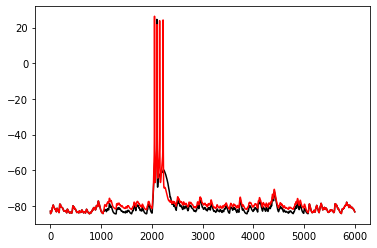

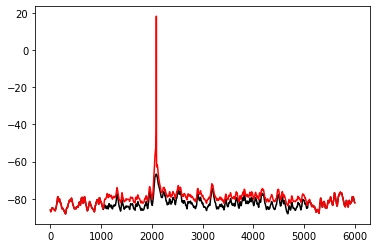

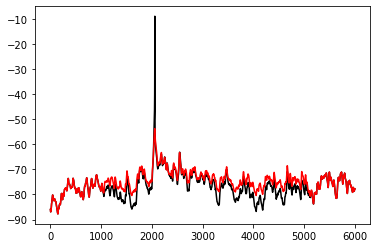

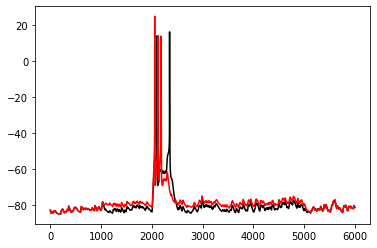

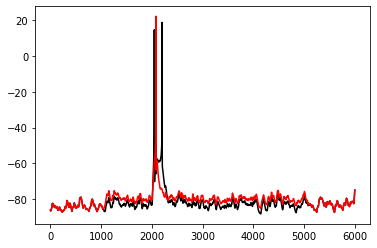

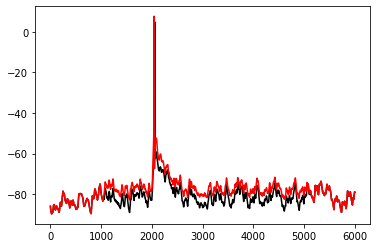

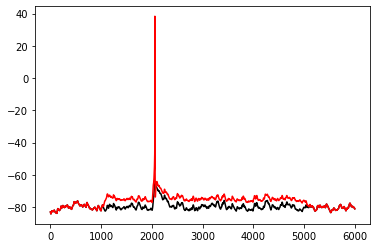

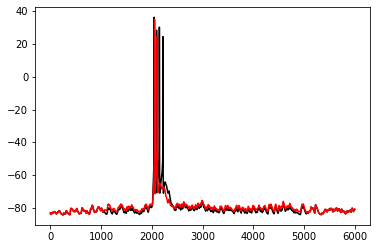

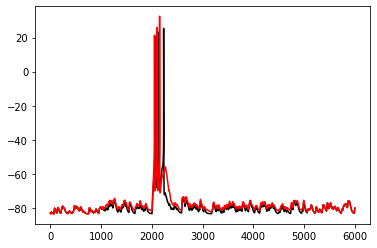

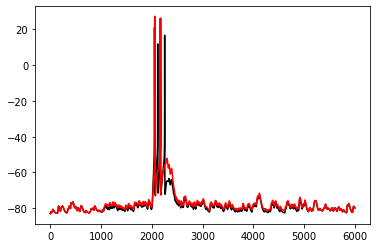

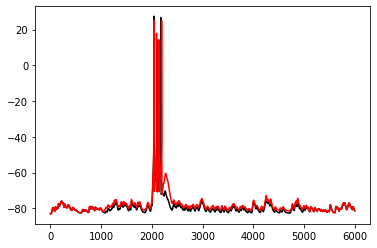

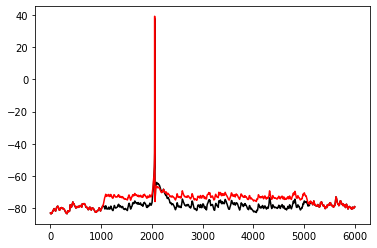

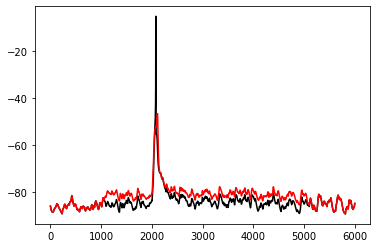

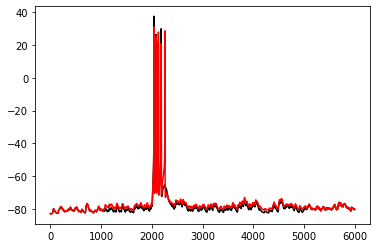

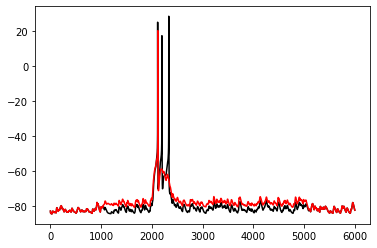

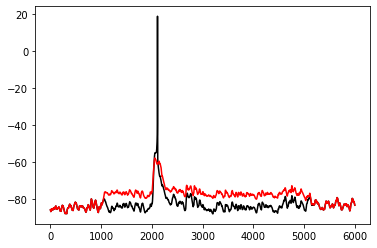

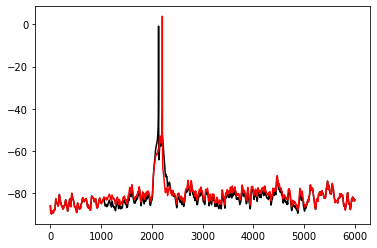

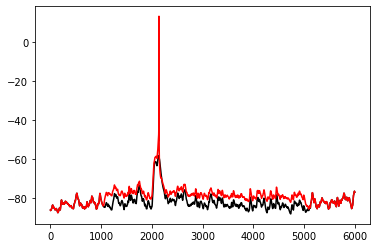

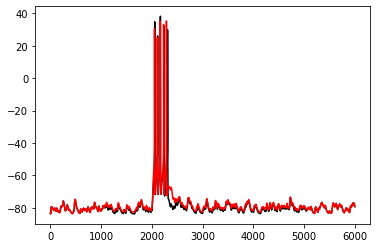

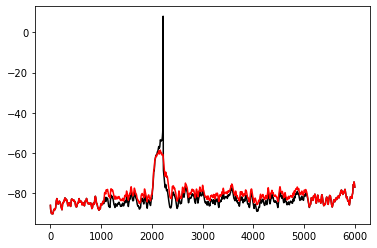

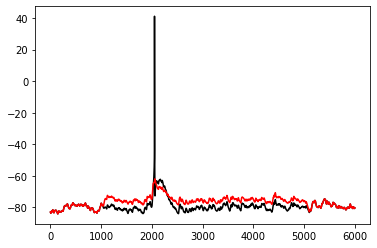

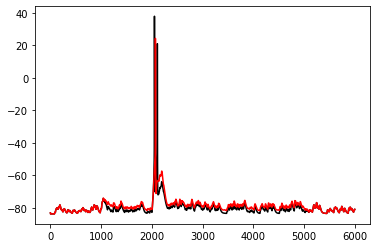

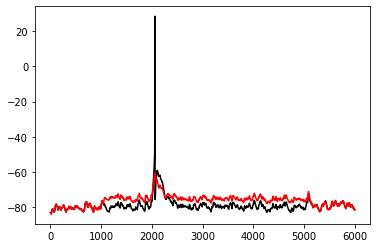

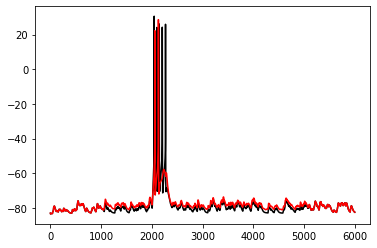

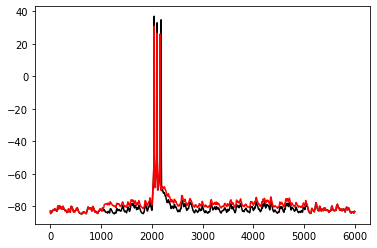

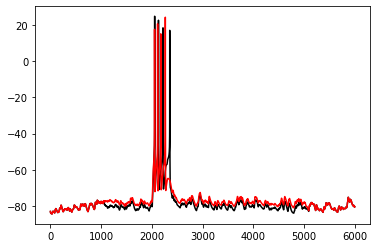

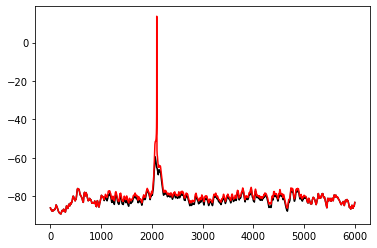

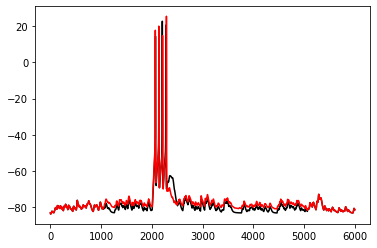

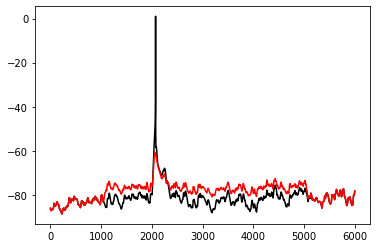

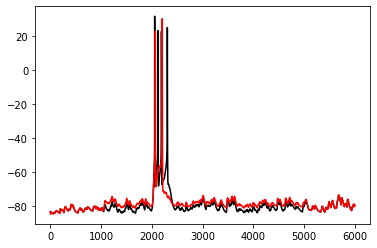

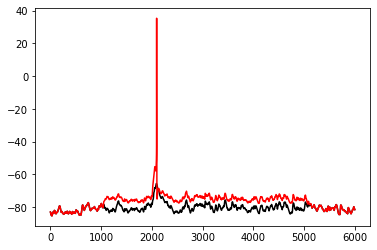

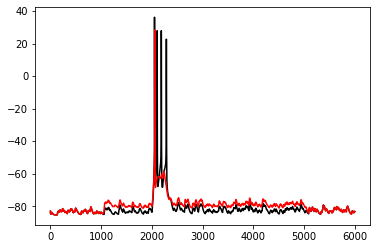

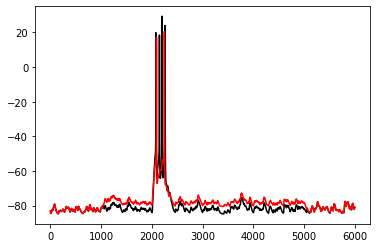

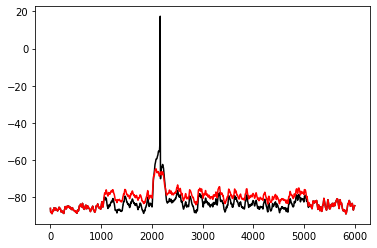

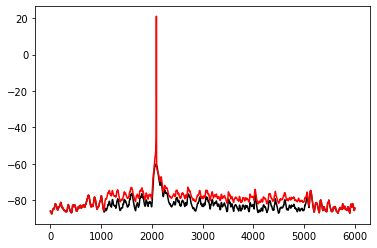

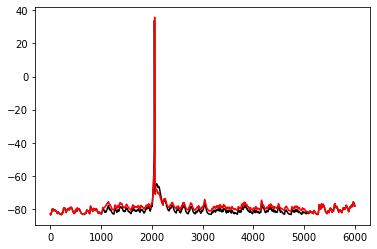

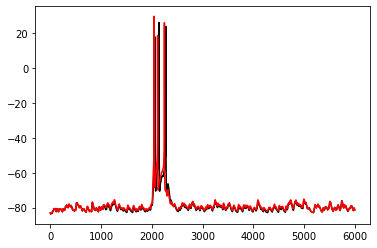

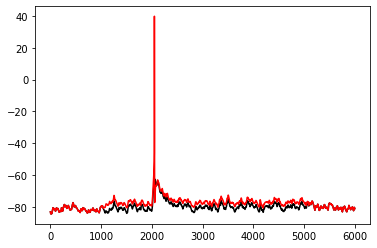

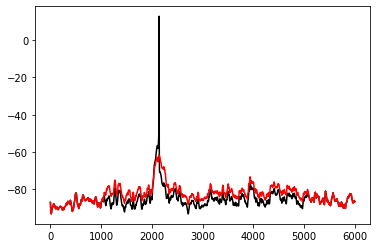

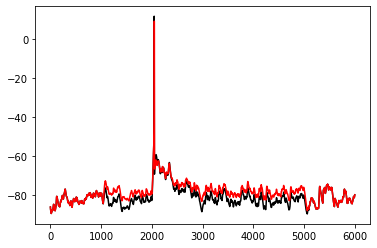

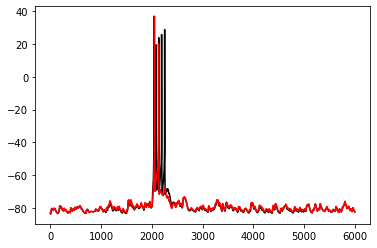

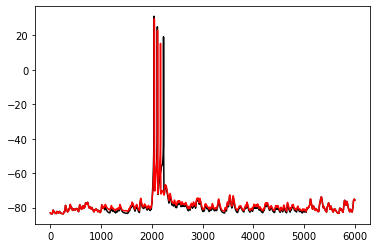

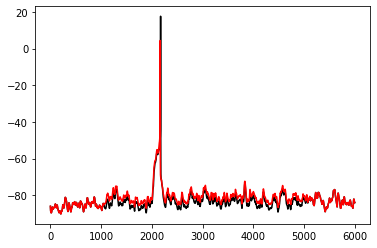

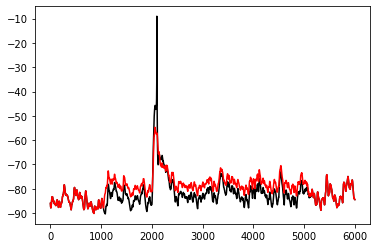

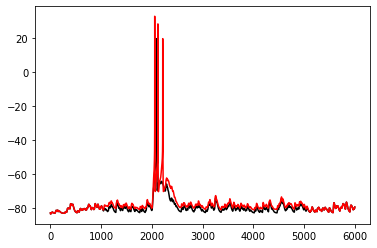

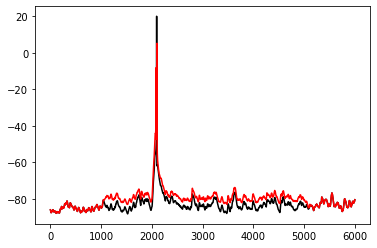

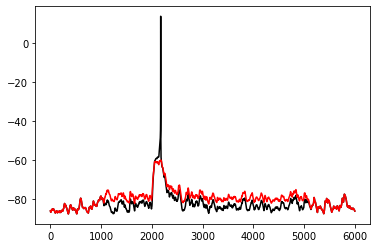

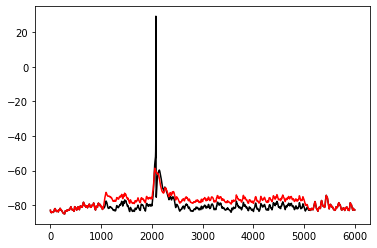

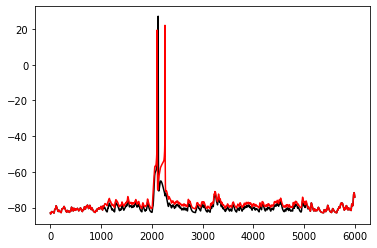

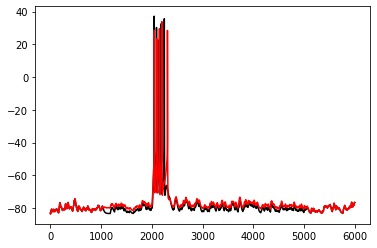

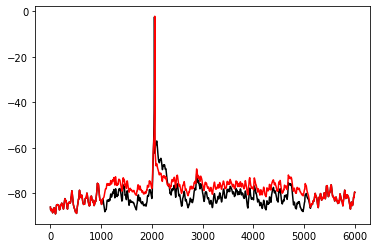

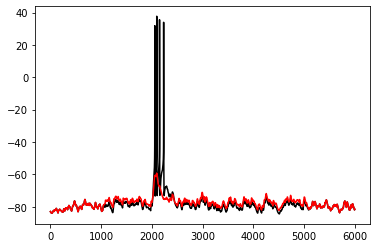

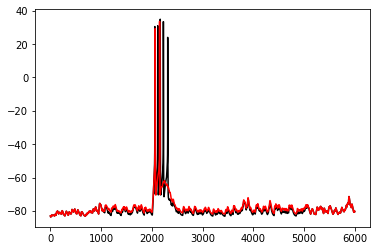

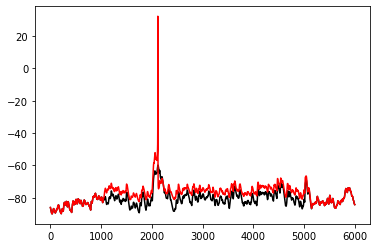

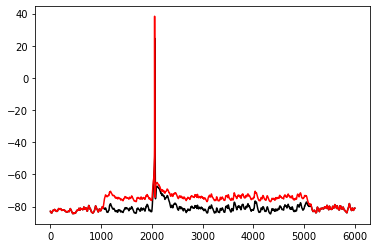

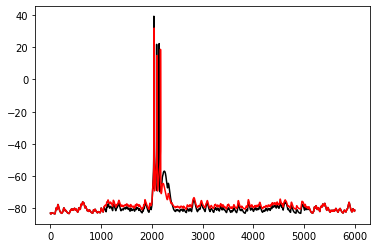

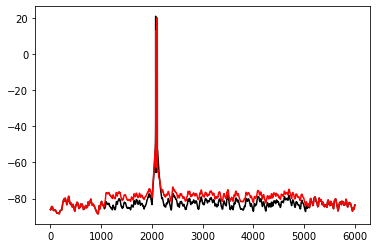

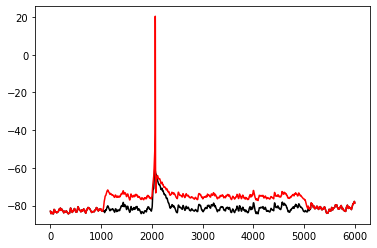

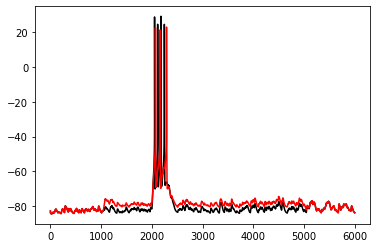

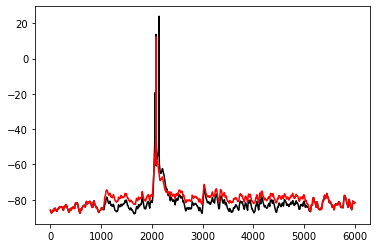

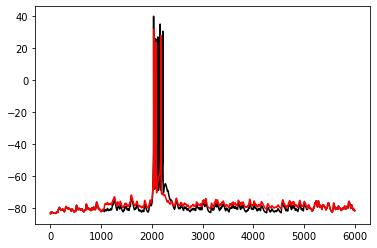

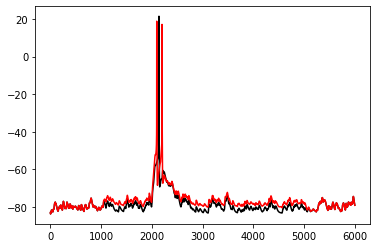

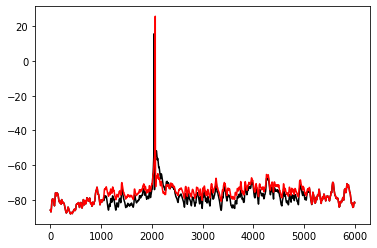

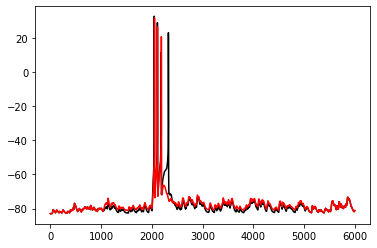

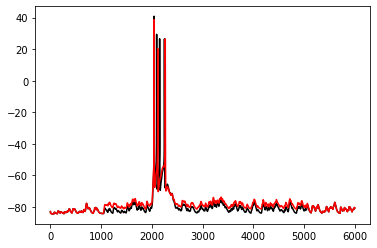

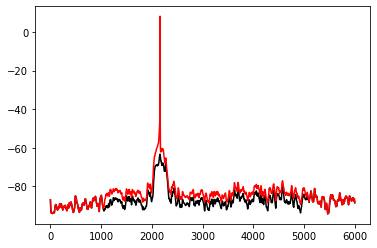

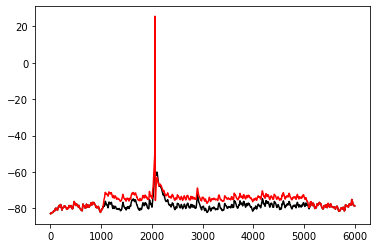

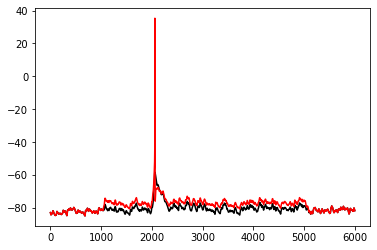

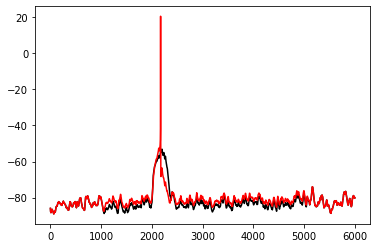

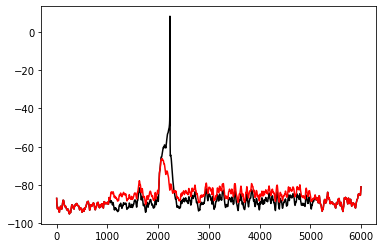

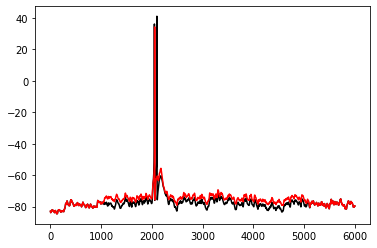

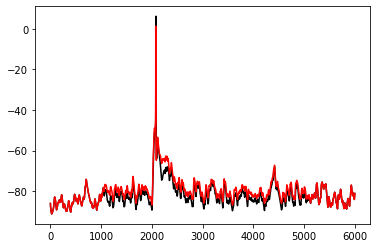

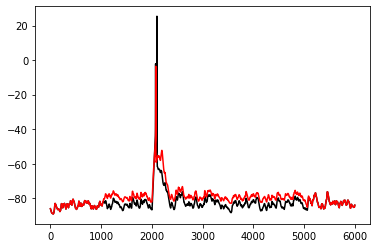

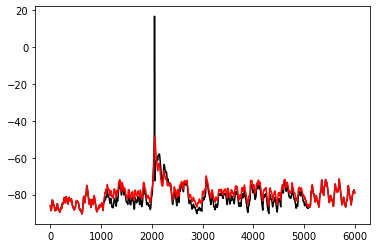

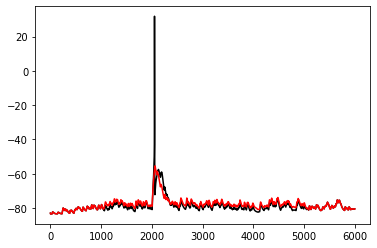

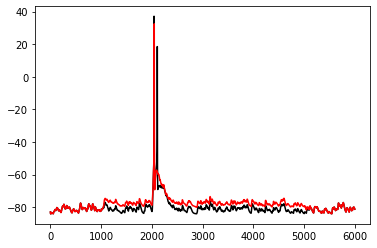

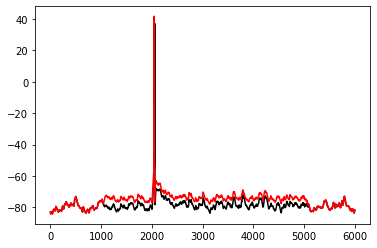

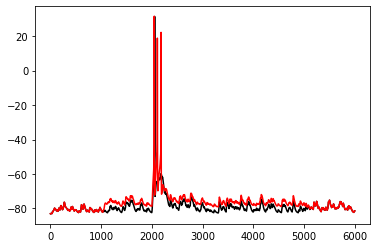

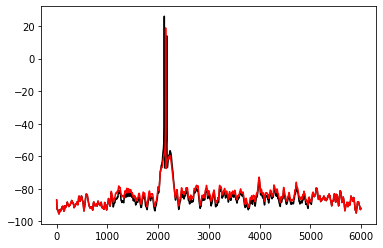

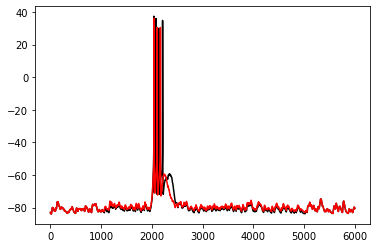

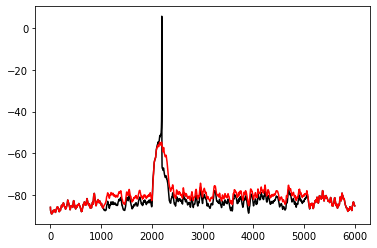

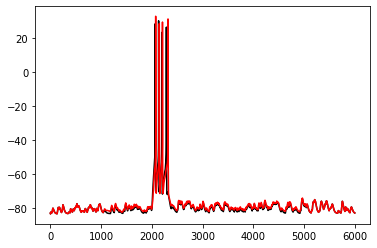

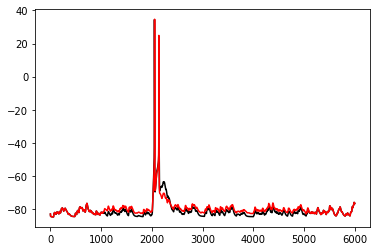

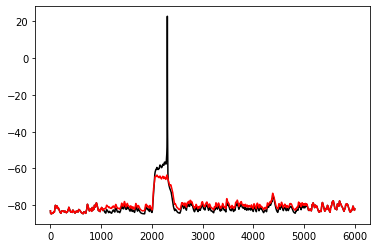

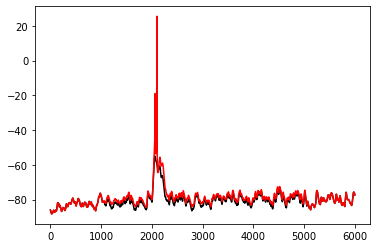

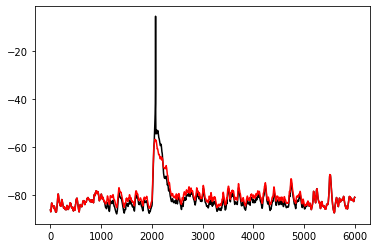

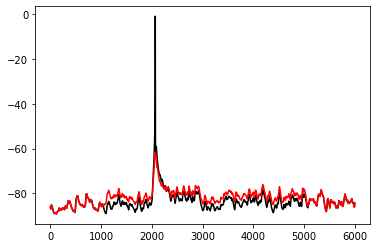

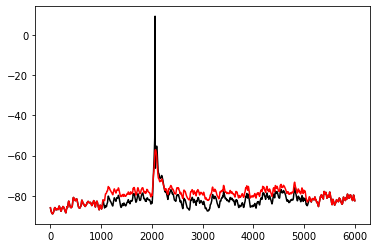

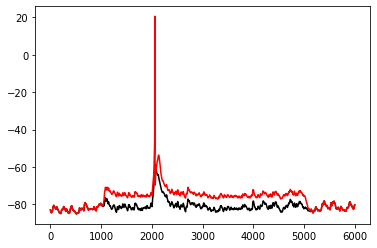

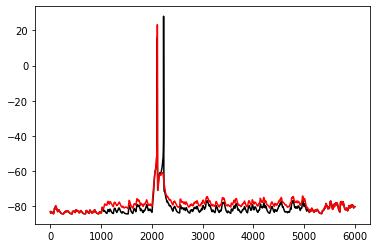

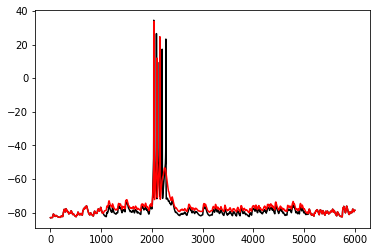

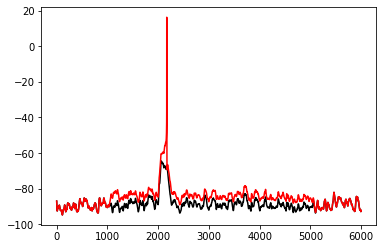

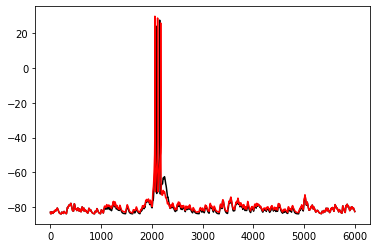

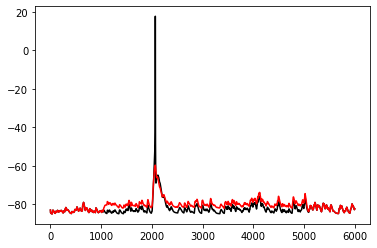

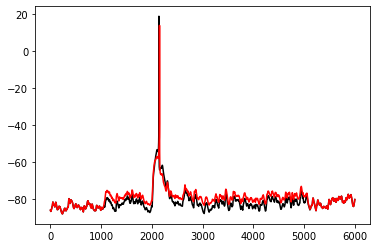

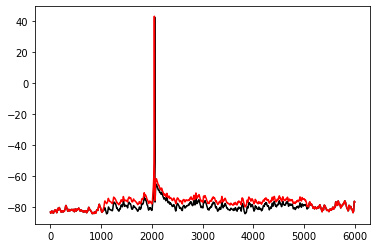

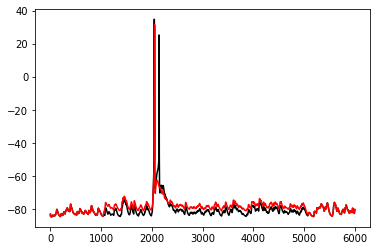

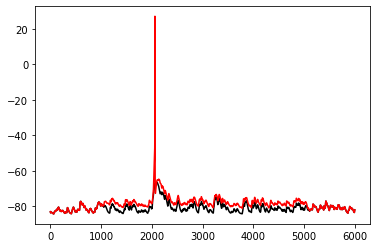

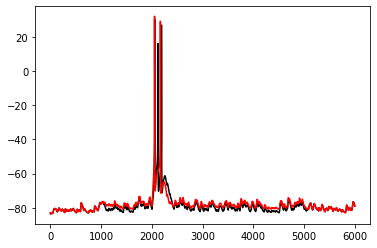

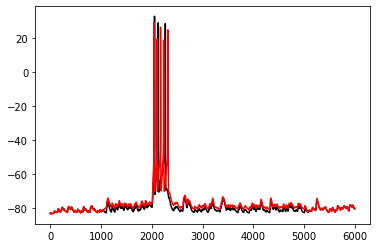

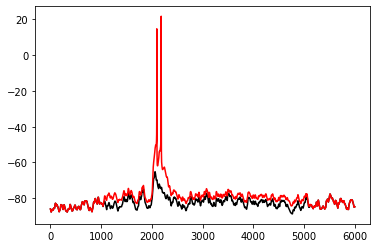

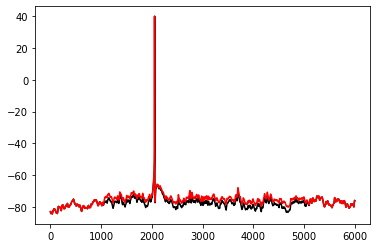

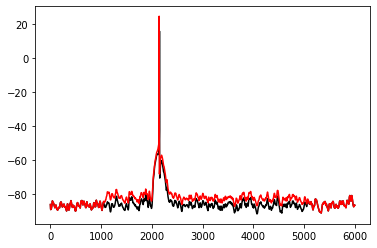

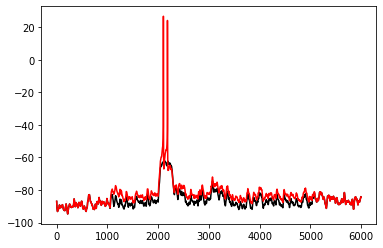

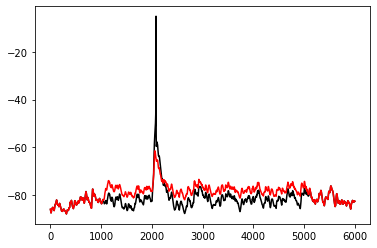

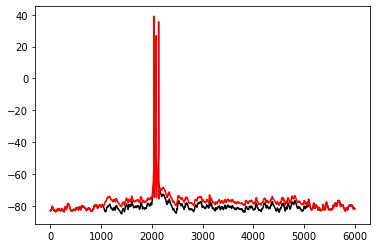

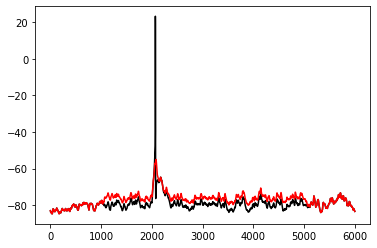

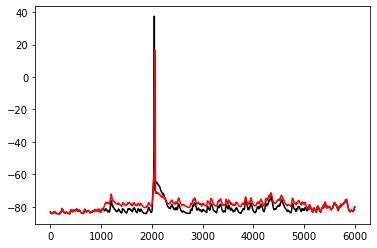

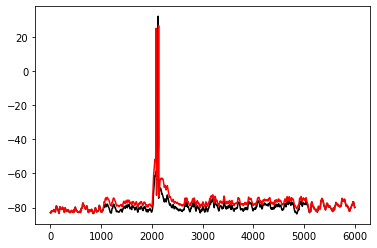

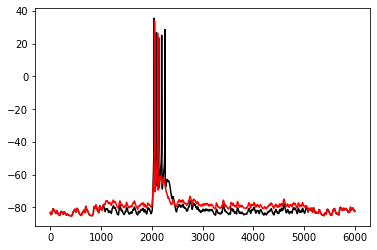

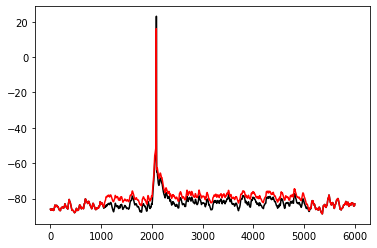

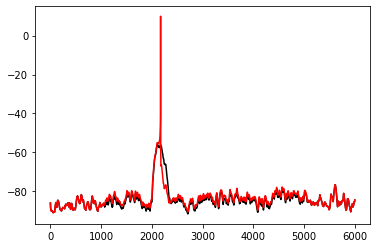

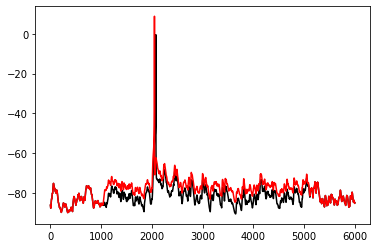

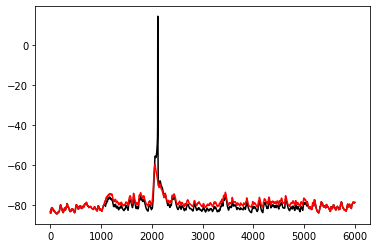

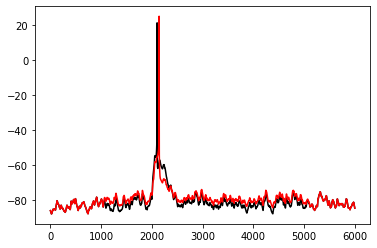

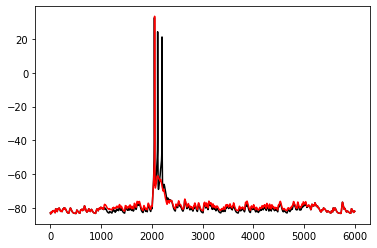

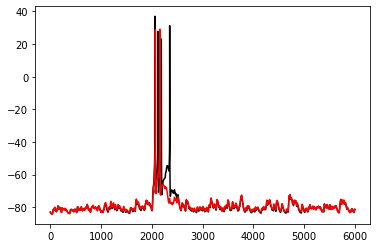

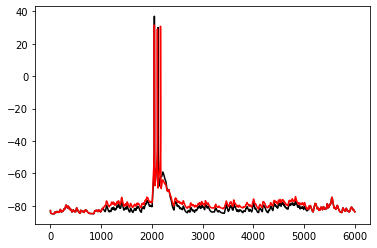

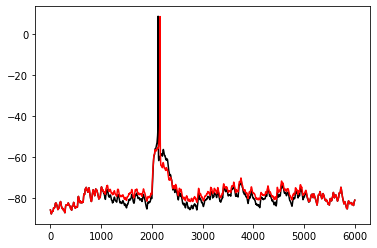

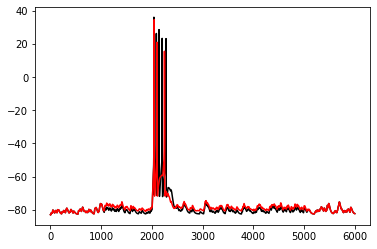

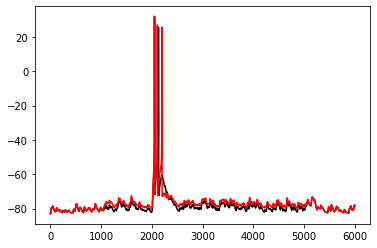

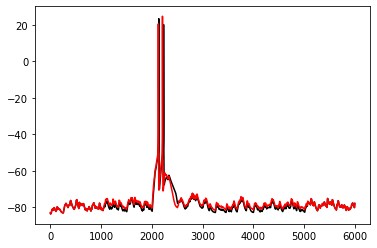

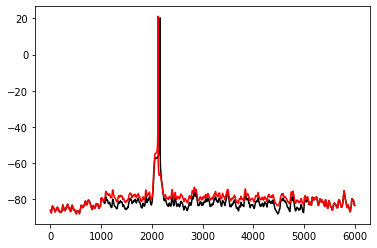

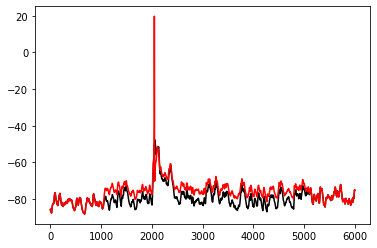

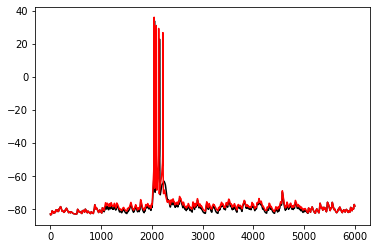

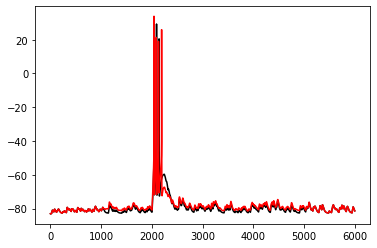

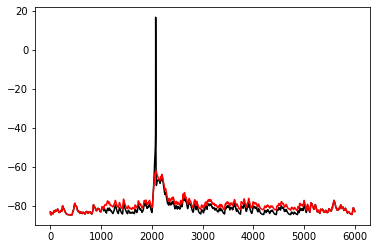

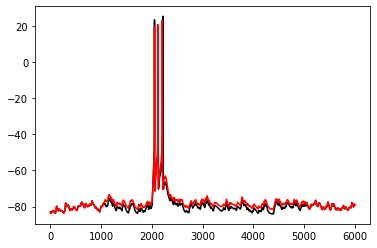

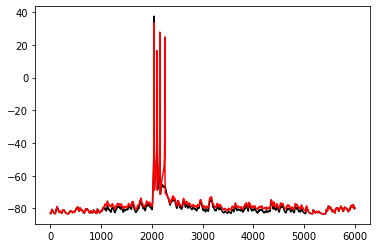

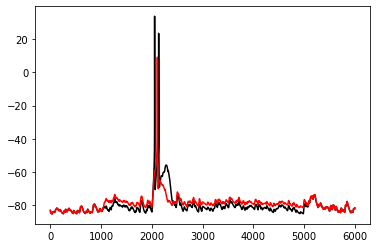

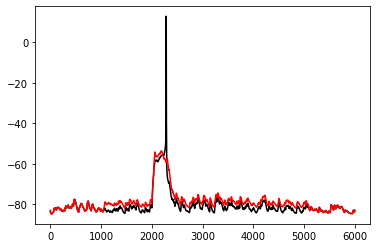

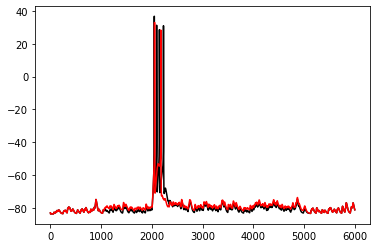

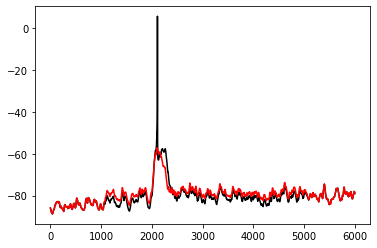

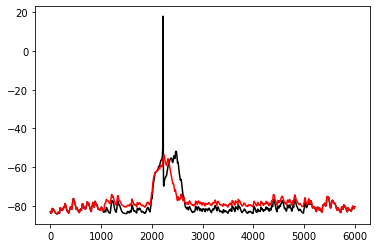

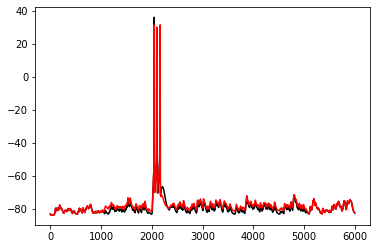

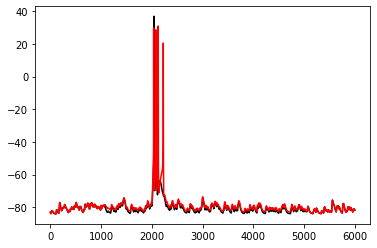

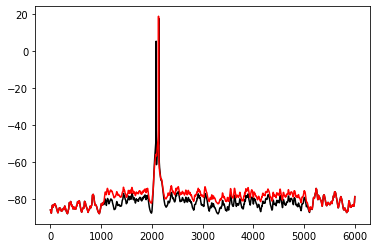

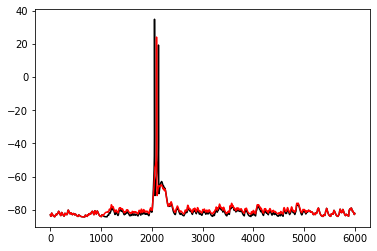

In [17]:
tmp_spiking = dict()
for trace_id in tmps:
    plotit = True
    plt.figure()
    for experiment_name in experiments:
        vsoma_per_trace_id = data_per_experiment[experiment_name].get_voltage(neuron_id=trace_id).T[0] *1e3

        if plotit:  
            
            if trace_id in frequency_analysis_dict_dspn[experiment_name]:
                    freq = frequency_analysis_dict_dspn[experiment_name][trace_id]
            elif trace_id in frequency_analysis_dict_ispn[experiment_name]:
                freq = frequency_analysis_dict_ispn[experiment_name][trace_id]
                
            if trace_id not in tmp_spiking:
                tmp_spiking.update({trace_id: {experiment_name: freq}})
                
            else:
                tmp_spiking[trace_id].update({experiment_name: freq})
                
            plt.plot(vsoma_per_trace_id, c=cs[experiment_name])
    plt.show()
        
        
        

In [18]:
d = {"response": list(), "frequency": list()}

In [19]:
for trace_id in tmp_spiking:
    for e in tmp_spiking[trace_id]:
        d["response"].append(e)
        frequency = tmp_spiking[trace_id][e]
        d["frequency"].append(frequency)
df = pd.DataFrame(data=d)   

In [20]:
cs = {"plateaus_without_inhibition": 'grey', 
      "plateaus_with_inhibition": 'red'}

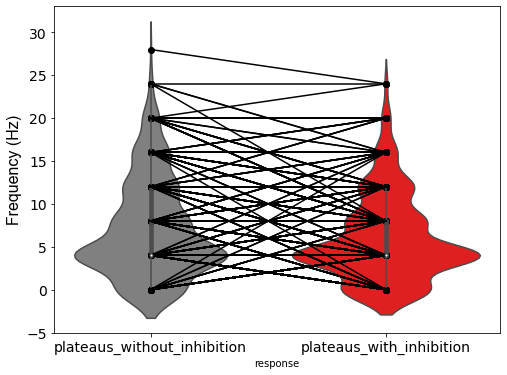

In [21]:
csfont = {"fontname": "Arial", 'fontsize': 16}
plt.figure(figsize=(8, 6))
sns.violinplot(x="response", y="frequency", data=df, palette=cs)

for trace_id in tmp_spiking:
    plt.scatter([0,1],[tmp_spiking[trace_id]['plateaus_without_inhibition'], tmp_spiking[trace_id]['plateaus_with_inhibition']], c="black")
    plt.plot([0,1], [tmp_spiking[trace_id]['plateaus_without_inhibition'], tmp_spiking[trace_id]['plateaus_with_inhibition']], c="black")
plt.ylabel("Frequency (Hz)", **csfont)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.savefig(os.path.join("spiking_shunting","shunting_spiking_compared.svg"))